In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Colab Notebooks/nlp_practice

/content/drive/MyDrive/Colab Notebooks/nlp_practice


In [3]:
#3-3-1 ファイル

f = open('example.txt', 'r', encoding = 'utf-8')
print(f)
print(f.read())
print('\n', end = '')
f.close()

f = open('example.txt', 'r', encoding = 'utf-8')
print(f.readline(), end = '')
print(f.readline(), end = '')
print(f.readline())
print('\n', end = '')
f.close()

f = open('example.txt', 'r', encoding = 'utf-8')
for line in f:
  print(line, end = '')
print('\n')
f.close()

with open('example.txt', 'w', encoding = 'utf-8') as f:
  f.write('Hello!')

with open('example.txt', 'r', encoding = 'utf-8') as f:
  print(f.read())

with open('example.txt', 'w', encoding = 'utf-8') as f:
  f.write('こんにちは\nこんばんは\nさようなら')

<_io.TextIOWrapper name='example.txt' mode='r' encoding='utf-8'>
こんにちは
こんばんは
さようなら

こんにちは
こんばんは
さようなら

こんにちは
こんばんは
さようなら

Hello!


In [4]:
#3-3-2,3 csv、tsv、json

import pandas as pd

df1 = pd.read_csv('example.csv', encoding = 'utf-8')
print(df1['grade'])

df2 = pd.read_csv('example1.csv', encoding = 'utf-8')
print(df2)

df3 = pd.read_csv('example1.csv', header = None, encoding = 'utf-8')
print(df3)

df4 = pd.read_csv('example1.csv',  header = None, names = ('name', 'grade') ,encoding = 'utf-8')
print(df4)

df5 = pd.read_csv('example.tsv', encoding = 'utf-8', sep = '\t')
print(df5)

df6 = pd.read_table('example.tsv', encoding = 'utf-8')
print(df6)

df7 = pd.read_json('example.json', encoding = 'utf-8')
print(df7)

df8 = pd.read_json('1.jsonl', lines = True, encoding = 'utf-8')
print(df8)

0    B
1    C
2    A
Name: grade, dtype: object
   高橋  B
0  佐藤  C
1  田中  A
    0  1
0  高橋  B
1  佐藤  C
2  田中  A
  name grade
0   高橋     B
1   佐藤     C
2   田中     A
  name grade
0   高橋     B
1   佐藤     C
2   田中     A
  name grade
0   高橋     B
1   佐藤     C
2   田中     A
  name grade
0   高橋     B
1   佐藤     C
2   田中     A


ValueError: ignored

In [ ]:
#3-4
#ぐるなび


In [5]:
#4-2-1 テキストのクリーニング
#beautifulsoup4
#正規表現

#beautifulsoup4

html = """
<html>
	<body>
		これは<a href = "http://example.com">Example</a>です。
	</body>
</html>"""

from bs4 import BeautifulSoup

def clean_html(html, strip = False):
  soup = BeautifulSoup(html, 'html.parser')
  text = soup.get_text(strip = strip)
  return text

print(clean_html(html))
print(clean_html(html, strip = True))


#正規表現

import re

text = '今度からMkDocsでドキュメントを書こう。 #Python'

def clean_hashtag(text):
  clearned_text = re.sub(r'#[a-zA-Z]+', '', text)
  return clearned_text

print('He\nllo')
print(r'He\nllo')
print(clean_hashtag(text))

text2 = '機械学習やるなら #Python がいいよね。 #jupyter'

print(clean_hashtag(text2))

def clean_hashtag2(text):
  cleaned_text = re.sub(r' #[a-zA-Z]+$', '', text)
  cleaned_text = re.sub(r' #([a-zA-Z]+) ', r'\1', cleaned_text)
  return cleaned_text

print(clean_hashtag2(text2))

text3 = '機械学習やるなら #Python がいいよね。 #jupyter #pycon #scipy'

def clean_hashtag3(text):
  cleaned_text = re.sub(r'( #[a-zA-Z]+)+$', '', text)
  cleaned_text = re.sub(r' #([a-zA-Z]+) ', r'\1', cleaned_text)
  return cleaned_text

print(clean_hashtag3(text3))




		これはExampleです。
	

これはExampleです。
He
llo
He\nllo
今度からMkDocsでドキュメントを書こう。 
機械学習やるなら  がいいよね。 
機械学習やるならPythonがいいよね。
機械学習やるならPythonがいいよね。


In [6]:
#4-2-2 単語分割

!pip install janome

from janome.tokenizer import Tokenizer

text = '彼女と国立新美術館へ行った。'
t = Tokenizer()
for token in t.tokenize(text):
  print(token)

print()

tt = Tokenizer(wakati = True)
for token in tt.tokenize(text):
  print(token)

print()

from janome.analyzer import Analyzer
from janome.tokenfilter import POSKeepFilter

token_filters = [POSKeepFilter('名詞')]
a = Analyzer(token_filters = token_filters)
for token in a.analyze(text):
  print(token)

print()

ttt = Tokenizer(udic = 'userdic.csv' , udic_enc = 'utf-8')
for token in ttt.tokenize(text):
  print(token)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 50.0 MB/s eta 0:00:00
彼女	名詞,代名詞,一般,*,*,*,彼女,カノジョ,カノジョ
と	助詞,格助詞,一般,*,*,*,と,ト,ト
国立	名詞,一般,*,*,*,*,国立,コクリツ,コクリツ
新	接頭詞,名詞接続,*,*,*,*,新,シン,シン
美術館	名詞,一般,*,*,*,*,美術館,ビジュツカン,ビジュツカン
へ	助詞,格助詞,一般,*,*,*,へ,ヘ,エ
行っ	動詞,自立,*,*,五段・カ行促音便,連用タ接続,行く,イッ,イッ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
。	記号,句点,*,*,*,*,。,。,。

彼女
と
国立
新
美術館
へ
行っ
た
。

彼女	名詞,代名詞,一般,*,*,*,彼女,カノジョ,カノジョ
国立	名詞,一般,*,*,*,*,国立,コクリツ,コクリツ
美術館	名詞,一般,*,*,*,*,美術館,ビジュツカン,ビジュツカン

彼女	名詞,代名詞,一般,*,*,*,彼女,カノジョ,カノジョ
と	助詞,並立助詞,*,*,*,*,と,ト,ト
国立新美術館	名詞,固有名詞,一般,*,*,*,国立新美術館,コクリツシンビジュツカン,コクリツシンビジュツカン
へ	助詞,格助詞,一般,*,*,*,へ,ヘ,エ
行っ	動詞,自立,*,*,五段・カ行促音便,連用タ接続,行く,イッ,イッ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
。	記号,句点,*,*,*,*,。,。,。


In [ ]:
#4-2-3 単語の正規化

import re

def normalize_number(text):
  replaced_text = re.sub(r'\d+', '0', text)
  return replaced_text

text = '2万0689・24ドル'
print(normalize_number(text))

def normalize_number2(text):
  replaced_text = re.sub(r'\d', '0', text)
  return replaced_text

print(normalize_number2(text))

0万0・0ドル
0万0000・00ドル
{'係', '怒', 'ところ', '秋', 'はじめ', '家', '略', '例', '市', '簿', '国', 'こと', '木', 'わたし', 'とき', 'レ', '度', '段', 'あと', 'これら', 'もと', '文', '類', '近く', 'がら', '面', '九', '五', 'うち', '点', '用', 'など', '村', '前', 'そこ', '自分', 'そう', '台', 'あたり', '首', '以降', '分', '秒', '書', '六', '我々', '時間', '下記', '本当', '未満', 'くせ', '箇月', '高', 'さん', '品', '元', '全部', '何', 'ほか', '間', 'こっち', 'みんな', 'どちら', '系', '新た', '見', 'そちら', 'どれ', 'ひと', '各', '都', 'から', '様々', 'みなさん', 'あっち', '箇所', 'こちら', 'それ', '感', '字', 'かく', '府', 'たび', 'わけ', '所', '年', '紀', '以下', 'あちら', '関係', 'いろいろ', '四', 'ごと', '士', '時点', '先', 'ヶ所', '自体', '何人', '際', 'あなた', '名', '冬', 'なに', '時', '道', 'すね', 'もの', '感じ', 'まさ', '内', '力', 'ぶり', 'なん', '方', 'どこか', 'どっち', '彼', 'がい', '週', '別', '会', '観', '女', '毎', '中', 'よそ', '以上', '情', 'まま', '千', '場', '外', 'まとも', '連', '線', '哀', 'たち', '年生', '第', '事', 'あそこ', 'そで', '左', 'まし', 'ぜんぶ', '集', '七', '誌', '課', '一', 'みつ', '月', 'ここ', 'すか', '歴', '通', '私', 'なかば', '火', '区', '万', '境', '半ば', '夏', '以後', 'いま', 'どこ', 'しよう', '今回', '人', '列', '右', '違い', 

In [ ]:
#4-2-4, 5, 6
#4-2-4 ストップワードの除去

#!pip install requests
import requests
!pip install janome
from janome.tokenizer import Tokenizer

url = "http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt"
r = requests.get(url)
tmp = r.text.split('\r\n')
with open('Japanese.txt', 'w', encoding = 'utf-8') as f:
  for i in range(len(tmp)):
    if len(tmp[i]) < 1:
        continue
    f.write(tmp[i] + '\n')

with open('Japanese.txt', 'r', encoding = 'utf-8') as f:
  stopwords = [w.strip() for w in f]
  stopwords = set(stopwords)
  print(stopwords)

def remove_stopwords(words, stopwords):
  words = [w for w in words if w not in stopwords]
  return words

t = Tokenizer(wakati = True)
text = 'リンゴをいくつか買う'
words = t.tokenize(text)
print(remove_stopwords(words, stopwords))


with open('ja.text8', 'r', encoding = 'utf-8') as f:
  text = f.read()
  words = text.split()

#!pip install collections
from collections import Counter
Counter(['cat', 'dog', 'cat'])

fdist = Counter(words)
fdist.most_common(n=10)


#4-2-5 単語のID化

UNK = '<UNK>'
PAD = '<PAD>'
vocab = {PAD: 0, UNK: 1}
for word, _ in fdist.most_common():
  vocab[word] = len(vocab)

words = ['私', 'は', '元気']
word_ids = [vocab.get(w, vocab[UNK]) for w in words]
print(word_ids)


#4-2-6 パディング

from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences = [[1, 2], [3, 4, 5], [6, 7, 8, 9]]
print(pad_sequences(sequences))
print(pad_sequences(sequences, padding = 'post'))
print(pad_sequences(sequences, maxlen = 3))
print(pad_sequences(sequences, maxlen = 3, truncating = 'post'))
print(pad_sequences(sequences, value = 10))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
{'確か', '全部', 'いろいろ', '形', 'すべて', 'あれ', 'いつ', '男', '万', '情', '口', 'ぺん', '楽', '類', 'すね', '時点', '列', 'がら', '半ば', '自分', 'ため', '下記', '観', '同じ', '等', '内', '名', '後', '簿', '化', 'まとも', '事', 'こっち', '例', '気', '束', '未満', 'よう', 'くせ', '場', 'ところ', '俺', '扱い', 'かやの', '様', '以上', '外', 'わたし', '通', 'かく', 'たび', '士', '秒', '所', '自体', '歳', 'ひと', '子', '五', '左', '集', 'こちら', 'まま', '時', 'ヶ月', 'がい', '地', '枚', '行', '伸', 'みなさん', '市', '一つ', '本当', '達', 'そう', 'どっち', '様々', '店', '前', 'それなり', '紀', 'みたい', '中', 'あな', '課', 'どこ', '室', '哀', '以前', '間', '屋', 'たくさん', 'すか', '見', '村', '席', '用', 'みつ', 'そで', 'とおり', '者', '関係', 'まし', '怒', 'ごろ', '法', '方法', '県', 'おれ', '輪', 'こと', '時間', 'ヶ所', '近く', 'とき', '道', '誰', '分', '兆', 'はず', '多く', '次', 'など', '感じ', 'きた', '右', '係', '六', '国', '年生', '上', '的', 'あっち', '会', 'あそこ', '八', '箇月', '以下', '誌', '系', 'もん', '今回', '町', 'ちゃ', '頃', '彼女', 'ちゃん', '週', '別', '十', '何人', '土', 'なかば', '秋', 'そっち', 'うち', '我々', 'レ', 'てん

In [ ]:
#4-3-2, 3, 4 前処理の実践

#4-3-2,3 データセットの準備

#utils.py
import string
import pandas as pd
import requests

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#テキストの英語の割合がthresholdよりも多ければ英語とみなす
def filter_by_ascii_rate(text, threshold = 0.9):
  ascii_letters = set(string.printable)
  rate = sum(c in ascii_letters for c in text) / len(text)
  return rate <= threshold

def load_dataset(filename, n = 5000, state = 6):                                                    
  df = pd.read_csv(filename, sep = '\t')

  #extract Japanese.txt
  is_jp = df.review_body.apply(filter_by_ascii_rate)
  df = df[is_jp]

  df = df.sample(frac = 1, random_state = state) #shuffle
  grouped = df.groupby('star_rating')
  df = grouped.head(n=n)
  return df.review_body.values, df.star_rating.values

def train_and_eval(x_train, y_train, x_test, y_test, lowercase = False, tokenize = None, preprocessor = None):
  vectorizer = CountVectorizer(lowercase = lowercase, tokenizer = tokenize, preprocessor = preprocessor)
  x_train_vec = vectorizer.fit_transform(x_train)
  x_test_vec = vectorizer.transform(x_test)
  clf = LogisticRegression(solver='liblinear')
  clf.fit(x_train_vec, y_train)
  y_pred = clf.predict(x_test_vec)
  score = accuracy_score(y_test, y_pred)
  print('{:.4f}'.format(score))


#preprocessing.py
import re

from bs4 import BeautifulSoup
from janome.tokenizer import Tokenizer
t = Tokenizer()

def clean_html(html, strip = False):
  soup = BeautifulSoup(html, 'html.parser')
  text = soup.get_text(strip = strip)
  return text

def tokenize(text):
  return t.tokenize(text, wakati = True)

def tokenize_base_form(text):
  tokens = [token.base_form for token in t.tokenize(text)]
  return tokens

def normalize_number(text, reduce = False):
  if reduce:
    normalize_text = re.sub(r'\d+', '0', text)
  else:
    normalize_text = re.sub(r'\d', '0', text)
  return normalize_text 


#4-3-4 モデルの学習と評価

#train.py
from sklearn.model_selection import train_test_split

#from preprocessing import *
#from utils import *

def main():
  x, y = load_dataset('amazon_reviews_multilingual_JP_v1_00.tsv', n = 1000)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
  print('Tokenization only.')
  train_and_eval(x_train, y_train, x_test, y_test, tokenize = tokenize)
  print('Clean html.')
  train_and_eval(x_train, y_train, x_test, y_test, tokenize = tokenize, preprocessor = clean_html)
  print('Normalize number.')
  train_and_eval(x_train, y_train, x_test, y_test, tokenize = tokenize, preprocessor = normalize_number)
  print('Base form')
  train_and_eval(x_train, y_train, x_test, y_test, tokenize = tokenize_base_form)
  print('Lower text.')
  train_and_eval(x_train, y_train, x_test, y_test, tokenize = tokenize, lowercase = True)

#if __main__ == '__main__':
  #main()

main()

Tokenization only.


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.4010
Clean html.


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.4060
Normalize number.
0.3970
Base form


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.3940
Lower text.


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#5-2-1

#質的変数
#商品名は名義特徴量
#サイズは順序特徴量
import pandas as pd

df = pd.DataFrame([
  ['Cola', 'S'],
  ['Cola', 'M'],
  ['Green Tea', 'L'],
  ['Milk', 'M']
], columns = ['drink', 'size'])
print(df.head())

#値の種類をunique()で確認
print(df['size'].unique())

#順序特徴量のマッピング
#サイズの列を辞書で値をmap()で変換させる
size2int = {'S': 0, 'M': 1, 'L': 2}
df['size'] = df['size'].map(size2int)
print(df.head())

print(df['size'].unique())

#名義特徴量の変換
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['drinklabel'] = encoder.fit_transform(df['drink'])
df.head()

#名義特徴量はone-hotエンコーディングする
print(pd.get_dummies(df))

       drink size
0       Cola    S
1       Cola    M
2  Green Tea    L
3       Milk    M
['S' 'M' 'L']
       drink  size
0       Cola     0
1       Cola     1
2  Green Tea     2
3       Milk     1
[0 1 2]


,size,drinklabel,drink_Cola,drink_Green Tea,drink_Milk
0,0,0,1,0,0
1,1,0,1,0,0
2,2,1,0,1,0
3,1,2,0,0,1


In [ ]:
#5-2-2　量的変数の処理

import pandas as pd

df = pd.DataFrame([
    [7.2500],
    [71.2833],
    [3.9820],
    [43.90123]
], columns = ['Fare'])
print(df['Fare'])
#閾値を決めて2値化
print(df['Fare'] > 10)
#真理値をastypeで整数値へ
print((df['Fare'] > 10).astype(int))

#丸め（値の精度は高すぎる必要はない）
df['FareInt'] = df['Fare'].round().astype(int)
df[['Fare', 'FareInt']].head()

0     7.25000
1    71.28330
2     3.98200
3    43.90123
Name: Fare, dtype: float64
0    False
1     True
2    False
3     True
Name: Fare, dtype: bool
0    0
1    1
2    0
3    1
Name: Fare, dtype: int64


,Fare,FareInt
0,7.25000,7
1,71.28330,71
2,3.98200,4
3,43.90123,44


In [ ]:
#5-3-1　テキストのベクトル表現　ngram BoW

#one-hotエンコーディング
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary = True)
docs = ['the cat is out of the bag', 'dogs are']
bow = vectorizer.fit_transform(docs)
print(bow.toarray())
print(vectorizer.vocabulary_)
#print(vectorizer.get_feature_names())

#countエンコーディング
vectorizer = CountVectorizer(binary = False)
docs = ['the cat is out of the bag', 'dogs are']
bow = vectorizer.fit_transform(docs)
print(bow.toarray())

#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
docs = ['the cat is out of the bag', 'the dogs are']
tfidf = vectorizer.fit_transform(docs)
print(tfidf.toarray())
vocab = vectorizer.get_feature_names() #colabだとなぜかエラー
pd.DataFrame(tfidf.toarray(), columns = vocab).round(2)

#分書
from janome import Tokenizer
t = Tokenizer(wakati=True)
vectorizer = CountVectrizer(tokenizer = t.tokenize)
docs = ['猫の子子猫', '獅子の子子獅子']
bow = vectorizer.fit_transform(docs)
vocab = vectorizer.get_feature_names()
pd.DataFrame(bow.toarray(), columns = vocab)

[[0 1 1 0 1 1 1 1]
 [1 0 0 1 0 0 0 0]]
{'the': 7, 'cat': 2, 'is': 4, 'out': 6, 'of': 5, 'bag': 1, 'dogs': 3, 'are': 0}
[[0 1 1 0 1 1 1 2]
 [1 0 0 1 0 0 0 0]]
[[0.         0.37729199 0.37729199 0.         0.37729199 0.37729199
  0.37729199 0.53689271]
 [0.6316672  0.         0.         0.6316672  0.         0.
  0.         0.44943642]]


AttributeError: ignored

In [ ]:
#おまけ 語順を気にする

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range = (1, 2))
docs = ['the cat is out of the bag', 'dogs are']
bow = vectorizer.fit_transform(docs)
print(vectorizer.vocabulary_)

{'the': 12, 'cat': 2, 'is': 6, 'out': 10, 'of': 8, 'bag': 1, 'the cat': 14, 'cat is': 3, 'is out': 7, 'out of': 11, 'of the': 9, 'the bag': 13, 'dogs': 4, 'are': 0, 'dogs are': 5}


In [ ]:
#5-4-2 ベクトル表現の実践 データセットの準備

#utils.py
import string
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#テキストの英語の割合がthresholdよりも多ければ英語とみなす
def filter_by_ascii_rate(text, threshold = 0.9):
  ascii_letters = set(string.printable)
  rate = sum(c in ascii_letters for c in text) / len(text)
  return rate <= threshold

def load_dataset(filename, n = 5000, state = 6):                                                    
  df = pd.read_csv(filename, sep = '\t')

  #Converts multi-class to binary-class

  mapping = {1: 0, 2: 0, 4: 1, 5: 1}
  df = df[df.star_rating != 3]
  df.star_rating = df.star_rating.map(mapping)

  #extract Japanese.txt
  is_jp = df.review_body.apply(filter_by_ascii_rate)
  df = df[is_jp]

  df = df.sample(frac = 1, random_state = state) #shuffle
  grouped = df.groupby('star_rating')
  df = grouped.head(n=n)
  return df.review_body.values, df.star_rating.values

def train_and_eval(x_train, y_train, x_test, y_test, vectorizer):
  x_train_vec = vectorizer.fit_transform(x_train)
  x_test_vec = vectorizer.transform(x_test)
  clf = LogisticRegression(solver='liblinear')
  clf.fit(x_train_vec, y_train)
  y_pred = clf.predict(x_test_vec)
  score = accuracy_score(y_test, y_pred)
  print('{:.4f}'.format(score))


#preprocessing.py
import re
from bs4 import BeautifulSoup
!pip install janome
from janome.tokenizer import Tokenizer
t = Tokenizer()

def clean_html(html, strip = False):
  soup = BeautifulSoup(html, 'html.parser')
  text = soup.get_text(strip = strip)
  return text

def tokenize(text):
  return t.tokenize(text, wakati = True)

#train.py
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#from preprocessing import *
#from utils import *

def main():
  x, y = load_dataset('amazon_reviews_multilingual_JP_v1_00.tsv', n = 5000)
  print('Tokenization')
  x = [clean_html(text, strip = True) for text in x]
  x = [' '.join(tokenize(text)) for text in x]     
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

  #出現するかどうかone-hot
  print('Binary')
  vectorizer = CountVectorizer(binary = True)
  train_and_eval(x_train, y_train, x_test, y_test, vectorizer)

  #出現回数one-hot
  print('Count')
  vectorizer = CountVectorizer(binary = False) 
  train_and_eval(x_train, y_train, x_test, y_test, vectorizer) 

  #TF-IDF
  print('TF-IDF')
  vectorizer = TfidfVectorizer()
  train_and_eval(x_train, y_train, x_test, y_test, vectorizer)

  #順序をもつBigram
  print('Bigram')
  vectorizer = TfidfVectorizer(ngram_range = (1, 2))
  train_and_eval(x_train, y_train, x_test, y_test, vectorizer)

#if __main__ == '__main__':
  #main()

main()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Tokenization
Binary
0.8385
Count
0.8360
TF-IDF
0.8520
Bigram
0.8545


In [ ]:
#5-5　特徴量のスケーリング

#正規化
from sklearn.preprocessing import MinMaxScaler

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit(data)
print(scaler.transform(data))

#標準化
from sklearn.preprocessing import StandardScaler

data = [[0, 10], [0, 15], [1, 20], [1, 25]]
scaler = StandardScaler()
scaler.fit(data)
print(scaler.transform(data))

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
[[-1.         -1.34164079]
 [-1.         -0.4472136 ]
 [ 1.          0.4472136 ]
 [ 1.          1.34164079]]


In [ ]:
#5-7 モデルの学習と評価

#feature_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#from preprocessing import *
#preprocessing.py
import re
from bs4 import BeautifulSoup
!pip install janome
from janome.tokenizer import Tokenizer
t = Tokenizer()

def clean_html(html, strip = False):
  soup = BeautifulSoup(html, 'html.parser')
  text = soup.get_text(strip = strip)
  return text

def tokenize(text):
  return t.tokenize(text, wakati = True)

#from utils import *
#utils.py
import string
import pandas as pd

#テキストの英語の割合がthresholdよりも多ければ英語とみなす
def filter_by_ascii_rate(text, threshold = 0.9):
  ascii_letters = set(string.printable)
  rate = sum(c in ascii_letters for c in text) / len(text)
  return rate <= threshold

def load_dataset(filename, n = 5000, state = 6):                                                    
  df = pd.read_csv(filename, sep = '\t')

  #Converts multi-class to binary-class

  mapping = {1: 0, 2: 0, 4: 1, 5: 1}
  df = df[df.star_rating != 3]
  df.star_rating = df.star_rating.map(mapping)

  #extract Japanese.txt
  is_jp = df.review_body.apply(filter_by_ascii_rate)
  df = df[is_jp]

  df = df.sample(frac = 1, random_state = state) #shuffle
  grouped = df.groupby('star_rating')
  df = grouped.head(n=n)
  return df.review_body.values, df.star_rating.values

def train_and_eval(x_train, y_train, x_test, y_test, vectorizer):
  x_train_vec = vectorizer.fit_transform(x_train)
  x_test_vec = vectorizer.transform(x_test)
  clf = LogisticRegression(solver='liblinear')
  clf.fit(x_train_vec, y_train)
  y_pred = clf.predict(x_test_vec)
  score = accuracy_score(y_test, y_pred)
  print('{:.4f}'.format(score))


#feature_selection.py
def main():
  print('Loading...')
  x, y = load_dataset('amazon_reviews_multilingual_JP_v1_00.tsv', n = 5000)
  print(x)
  print(y)
  x = [clean_html(text, strip = True) for text in x]   
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

  print('Vectorizing...')
  vectorizer = CountVectorizer(tokenizer = tokenize)
  x_train = vectorizer.fit_transform(x_train)
  x_test = vectorizer.transform(x_test)
  print(x_train.shape)
  print(x_test.shape)

  print('Selecting features...')
  selector = SelectKBest(k = 7000, score_func = mutual_info_classif)
  selector.fit(x_train, y_train)
  x_train_new = selector.transform(x_train)
  x_test_new = selector.transform(x_test)
  print(x_train_new.shape)
  print(x_test_new.shape)

  print('Evaluating...')
  clf = LogisticRegression(solver = 'liblinear')
  clf.fit(x_train_new, y_train)
  y_pred = clf.predict(x_test_new)
  score = accuracy_score(y_test, y_pred)
  print('{:.4f}'.format(score))

#if __main__ == '__main__':
  #main()

main()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Loading...
['現在、地球温暖化の悪影響が、ここまで顕在化しているとは<br />想像していませんでした。特に、このまま海面温度が上昇を<br />続けると、早晩、南極・北極の氷が大規模に溶けることに<br />よって相当の範囲の陸地が海に没し、十億人単位での難民が<br />発生するという事実には、本当に衝撃を受けました。<br /><br />ある人が、「人間は地球にすくう癌細胞のようである。<br />増殖・破壊を続け、最終的には自らも寄生先の死によって<br />滅ぶ運命にある」と言っていたことを思い出しました。<br /><br />一方、主人公であるゴア氏が、聴衆が数十人〜数百人程度の<br />世界中の教室・会議場をまわって危機を訴えるという、地道<br />な「草の根」の活動にも大変感銘を受けました。個人的には、<br />ゴア氏には、ブッシュ氏との大統領戦における、「賢いが<br />傲慢で冷徹」というイメージが強かったのですが、およそ<br />そんなことはない（＝きっと、ブッシュ陣営のネガティブ・<br />キャンペーンの影響を愚かにも受けていたのでしょう）、<br />信念を持ち、実行力が伴った、特筆すべき政治家であること<br />も分かりました。<br /><br />温暖化の危機、ゴア氏ほかの活動家・学者の行動に対する<br />不明を恥じると共に、自らもCO2ゼロ化に向けて早速行動<br />したいと思いました。<br /><br />なお、当作品は、語られる事象のすべてが具体的かつ<br />客観的に科学的根拠に支えられており、ドキュメンタリー<br />としても秀逸だと思います。<br /><br />是非ご覧になってみて下さい。お奨めします。'
 'このアクション映画ほど、男気を感じたものはあったのだろうか。<br />シンプル構成で時間をたっぷりと使った中身のあるアクション映画です。<br /><br />劇中、鉄斧を持った闇のサイコ集団（敵）が出てくるんですが<br />スタローンがこれでもかと、鉄拳制裁っ！するあたりは

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


KeyboardInterrupt: ignored

In [ ]:
#6-2 ロジスティック回帰

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score


#from preprocessing import *
#preprocessing.py
import re
from bs4 import BeautifulSoup
!pip install janome
from janome.tokenizer import Tokenizer
t = Tokenizer()

def clean_html(html, strip = False):
  soup = BeautifulSoup(html, 'html.parser')
  text = soup.get_text(strip = strip)
  return text

def tokenize(text):
  return t.tokenize(text, wakati = True)


#from utils import *
#utils.py
import string
import pandas as pd

#テキストの英語の割合がthresholdよりも多ければ英語とみなす
def filter_by_ascii_rate(text, threshold = 0.9):
  ascii_letters = set(string.printable)
  rate = sum(c in ascii_letters for c in text) / len(text)
  return rate <= threshold

def load_dataset(filename, n = 5000, state = 6):                                                    
  df = pd.read_csv(filename, sep = '\t')

  #Converts multi-class to binary-class

  mapping = {1: 0, 2: 0, 4: 1, 5: 1}
  df = df[df.star_rating != 3]
  df.star_rating = df.star_rating.map(mapping)

  #extract Japanese.txt
  is_jp = df.review_body.apply(filter_by_ascii_rate)
  df = df[is_jp]

  df = df.sample(frac = 1, random_state = state) #shuffle
  grouped = df.groupby('star_rating')
  df = grouped.head(n=n)
  return df.review_body.values, df.star_rating.values

def train_and_eval(x_train, y_train, x_test, y_test, vectorizer):
  x_train_vec = vectorizer.fit_transform(x_train)
  x_test_vec = vectorizer.transform(x_test)
  clf = LogisticRegression(solver='liblinear')
  clf.fit(x_train_vec, y_train)
  y_pred = clf.predict(x_test_vec)
  score = accuracy_score(y_test, y_pred)
  print('{:.4f}'.format(score))


#train.py
def main():
  x, y = load_dataset('amazon_reviews_multilingual_JP_v1_00.tsv', n = 5000)
  x = [clean_html(text, strip = True) for text in x]   
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

  vectorizer = TfidfVectorizer(tokenizer = tokenize)
  x_train_vec = vectorizer.fit_transform(x_train)
  x_test_vec = vectorizer.transform(x_test)

  clf = LogisticRegression(solver = 'liblinear')
  clf.fit(x_train_vec, y_train)

  y_pred = clf.predict(x_test_vec)
  score = accuracy_score(y_test, y_pred)
  print('Accuracy(test): {:.4f}'.format(score))

#if __name__ == '__main__'
  #main()

main()


#cross_validation.py
x, y = load_dataset('amazon_reviews_multilingual_JP_v1_00.tsv', n = 5000)
x = [clean_html(text, strip = True) for text in x]   
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

vectorizer = TfidfVectorizer(tokenizer = tokenize)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

clf = LogisticRegression(solver = 'liblinear')
scores = cross_val_score(clf, x_train_vec, y_train, cv = 5)
print(scores)
print('Accuracy: {:.4f} (+/- {:.4f})'.format(scores.mean(), scores.std() * 2))

clf.fit(x_train_vec, y_train)
y_pred = clf.predict(x_test_vec)
score = accuracy_score(y_test, y_pred)
print('Accuracy(test): {:.4f}'.format(score))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 30.5 MB/s eta 0:00:00


KeyboardInterrupt: ignored

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


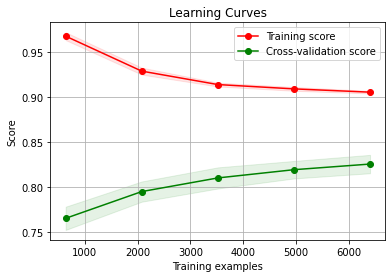

In [ ]:
#6-6 学習曲線

#utils.py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None, n_jobs = -1, train_sizes = np.linspace(.1, 1.0, 5)):
  plt.figure()
  plt.title(title)
  if ylim is not None:
    plt.ylim(*ylim)
  plt.xlabel('Training examples')
  plt.ylabel('Score')
  train_sizes, train_scores, test_scores = learning_curve(
      estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes
  )
  train_scores_mean = np.mean(train_scores, axis = 1)
  train_scores_std = np.std(train_scores, axis = 1)
  test_scores_mean = np.mean(test_scores, axis = 1)
  test_scores_std = np.std(test_scores, axis = 1)
  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
  plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r', label = 'Training score')
  plt.plot(train_sizes, test_scores_mean, 'o-', color = 'g', label = 'Cross-validation score')

  plt.legend(loc = 'best')

  plt.show()

#learning_curve.py

from sklearn.model_selection import ShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#from preprocessing import *
#preprocessing.py
import re
from bs4 import BeautifulSoup
!pip install janome
from janome.tokenizer import Tokenizer
t = Tokenizer()

def clean_html(html, strip = False):
  soup = BeautifulSoup(html, 'html.parser')
  text = soup.get_text(strip = strip)
  return text

def tokenize(text):
  return t.tokenize(text, wakati = True)

#from utils import *

def main():
  x, y = load_dataset('amazon_reviews_multilingual_JP_v1_00.tsv', n = 5000)
  x = [clean_html(text, strip = True) for text in x]   
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

  vectorizer = TfidfVectorizer(tokenizer = tokenize)
  x_train_vec = vectorizer.fit_transform(x_train)
  x_test_vec = vectorizer.transform(x_test)

  title = 'Learning Curves'
  cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
  clf = LogisticRegression(solver = 'liblinear')
  plot_learning_curve(clf, title, x_train_vec, y_train, cv = cv)

main()


In [ ]:
#6-8 ハイパーパラメータチューニング

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 


#from preprocessing import *
#preprocessing.py
import re
from bs4 import BeautifulSoup
!pip install janome
from janome.tokenizer import Tokenizer
t = Tokenizer()

def clean_html(html, strip = False):
  soup = BeautifulSoup(html, 'html.parser')
  text = soup.get_text(strip = strip)
  return text

def tokenize(text):
  return t.tokenize(text, wakati = True)


#from utils import *
#utils.py
import string
import pandas as pd

#テキストの英語の割合がthresholdよりも多ければ英語とみなす
def filter_by_ascii_rate(text, threshold = 0.9):
  ascii_letters = set(string.printable)
  rate = sum(c in ascii_letters for c in text) / len(text)
  return rate <= threshold

def load_dataset(filename, n = 5000, state = 6):                                                    
  df = pd.read_csv(filename, sep = '\t')

  #Converts multi-class to binary-class

  mapping = {1: 0, 2: 0, 4: 1, 5: 1}
  df = df[df.star_rating != 3]
  df.star_rating = df.star_rating.map(mapping)

  #extract Japanese.txt
  is_jp = df.review_body.apply(filter_by_ascii_rate)
  df = df[is_jp]

  df = df.sample(frac = 1, random_state = state) #shuffle
  grouped = df.groupby('star_rating')
  df = grouped.head(n=n)
  return df.review_body.values, df.star_rating.values

def train_and_eval(x_train, y_train, x_test, y_test, vectorizer):
  x_train_vec = vectorizer.fit_transform(x_train)
  x_test_vec = vectorizer.transform(x_test)
  clf = LogisticRegression(solver='liblinear')
  clf.fit(x_train_vec, y_train)
  y_pred = clf.predict(x_test_vec)
  score = accuracy_score(y_test, y_pred)
  print('{:.4f}'.format(score))


#hp_optimization.py
x, y = load_dataset('amazon_reviews_multilingual_JP_v1_00.tsv', n = 5000)
x = [clean_html(text, strip = True) for text in x]   
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

vectorizer = TfidfVectorizer(tokenizer = tokenize)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

parameters = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.03, 0.1, 0.3, 0.7, 1, 1.01, 1.03, 1.07, 1.1, 1.3, 1.7, 3]}
lr = LogisticRegression(solver = 'liblinear')
clf = GridSearchCV(lr, parameters, cv = 5, n_jobs = -1)
clf.fit(x_train_vec, y_train)

best_clf = clf.best_estimator_
print(clf.best_params_)
print('Accuracy(best): {:.4f}'.format(clf.best_score_))
y_pred = best_clf.predict(x_test_vec)
score = accuracy_score(y_test, y_pred)
print('Accuracy_score(test): {:.4f}'.format(score))

main()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy(test): 0.8440


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'C': 3, 'penalty': 'l2'}
Accuracy(best): 0.8332
Accuracy_score(test): 0.8540


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy(test): 0.8440


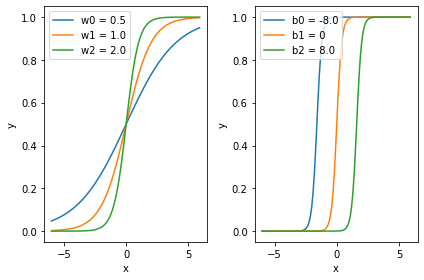

In [ ]:
#7-3 ニューラルネットワーク バイアス

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-6, 6, 0.1)
weights = [0.5, 1.0, 2.0]
for i, w in enumerate(weights):
  f = 1 / (1 + np.exp(-x * w))
  label = 'w{} = {}'.format(i, w)
  plt.subplot(1, 2, 1)
  plt.plot(x, f, label = label)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 2)

w = 5
biases = [-8.0, 0, 8.0]
for i, b in enumerate(biases):
  f = 1 / (1 + np.exp(-x * w + b))
  label = 'b{} = {}'.format(i, b)
  plt.subplot(1, 2, 2)
  plt.plot(x, f, label = label)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 2)

plt.tight_layout()
plt.show()

In [ ]:
#7-5 Kerasによるニューラルネットワーク

#Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(units= 32, activation = 'relu', input_shape = (16,)))
model.add(Dense(units = 5, activation = 'softmax'))

inputs = np.ones((1, 16), dtype = np.float32)
model (inputs)

#Functutional API
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
x = Input(shape = (16,))
h = Dense(units = 32, activation = 'relu')(x)
y = Dense(units = 5, activation = 'softmax')(h)
model = Model(inputs = [x], outputs = [y])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 5)                 165       
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Epoch 1/100
200/200 [==============================] - 6s 25ms/step - loss: 0.5236 - accuracy: 0.7809 - val_loss: 0.4315 - val_accuracy: 0.8300
Epoch 2/100
200/200 [==============================] - 6s 28ms/step - loss: 0.2648 - accuracy: 0.9183 - val_loss: 0.4270 - val_accuracy: 0.8300
Epoch 3/100
200/200 [==============================] - 4s 22ms/step - loss: 0.1450 - accuracy: 0.9656 - val_loss: 0.4340 - val_accuracy: 0.8375
Epoch 4/100
200/200 [==============================] - 4s 20ms/step - loss: 0.0836 - accuracy: 0.9847 - val_loss: 0.4788 - val_accuracy: 0.8319
Epoch 5/100
1/1 [==============================] - 0s 124ms/step
[[0.33710438 0.66289556]]


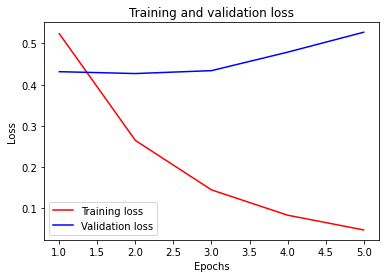

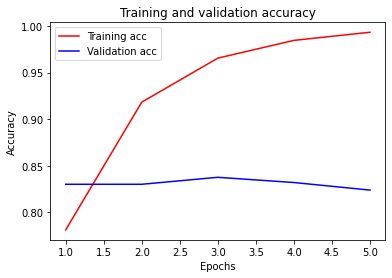

In [ ]:
#実践


#model.py

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(vocab_size, label_size, hidden_size = 16):
  model = Sequential()
  model.add(Dense(hidden_size, activation = 'relu', input_shape = (vocab_size,)))
  model.add(Dense(label_size, activation = 'softmax'))
  return model


#Sequenceクラスを使う場合のクラス定義

import math
from tensorflow.keras.utils import Sequence

class Generator(Sequence):

  def __init__(self, x, y, batch_size = 32):
    self.x = x
    self.y = y
    self.batch_size = batch_size

  def __getitem__(self, idx):
    batch_x = self.x[idx * self.batch_size: (idx + 1) * self.batch_size]
    batch_y = self.y[idx * self.batch_size: (idx + 1) * self.batch_size]
    return batch_x, batch_y

  def __len__(self):
    return math.ceil(len(self.x) / self.batch_size)


#from preprocessing import *
#preprocessing.py
import re
from bs4 import BeautifulSoup
!pip install janome
from janome.tokenizer import Tokenizer
t = Tokenizer()

def clean_html(html, strip = False):
  soup = BeautifulSoup(html, 'html.parser')
  text = soup.get_text(strip = strip)
  return text

def tokenize(text):
  return t.tokenize(text, wakati = True)


#from utils import *
#utils.py
import string
import pandas as pd
import matplotlib.pyplot as plt

#テキストの英語の割合がthresholdよりも多ければ英語とみなす
def filter_by_ascii_rate(text, threshold = 0.9):
  ascii_letters = set(string.printable)
  rate = sum(c in ascii_letters for c in text) / len(text)
  return rate <= threshold

def load_dataset(filename, n = 5000, state = 6):                                                    
  df = pd.read_csv(filename, sep = '\t')

  #Converts multi-class to binary-class
  mapping = {1: 0, 2: 0, 4: 1, 5: 1}
  df = df[df.star_rating != 3]
  df.star_rating = df.star_rating.map(mapping)

  #extract Japanese text
  is_jp = df.review_body.apply(filter_by_ascii_rate)
  df = df[is_jp]

  #sampling
  df = df.sample(frac = 1, random_state = state) #shuffle
  grouped = df.groupby('star_rating')
  df = grouped.head(n=n)
  return df.review_body.values, df.star_rating.values

def train_and_eval(x_train, y_train, x_test, y_test, vectorizer):
  x_train_vec = vectorizer.fit_transform(x_train)
  x_test_vec = vectorizer.transform(x_test)
  clf = LogisticRegression(solver='liblinear')
  clf.fit(x_train_vec, y_train)
  y_pred = clf.predict(x_test_vec)
  score = accuracy_score(y_test, y_pred)
  print('{:.4f}'.format(score))

def plot_history(history):
  #Setting
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(1, len(loss) + 1)

  #Plotting loss
  plt.plot(epochs, loss, 'r', label = 'Training loss')
  plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.figure()

  #Plotting accuracy
  plt.plot(epochs, acc, 'r', label = 'Training acc')
  plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()


#train.py

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.models import load_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

#from model import create_model
#from preprocessing import *
#from utils import *

def main():
  #データセットの読み込み
  x, y = load_dataset('amazon_reviews_multilingual_JP_v1_00.tsv', n = 5000)
  x = [clean_html(text, strip = True) for text in x]   
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

  vectorizer = CountVectorizer(tokenizer = tokenize)
  x_train = vectorizer.fit_transform(x_train)
  x_test = vectorizer.transform(x_test)
  x_train = x_train.toarray()
  x_test = x_test.toarray()

  #ハイパーパラメータの設定
  vocab_size = len(vectorizer.vocabulary_)
  label_size = len(set(y_train))

  #モデルの構築
  model = create_model(vocab_size, label_size)
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])
  
  #コールバックの準備
  filepath = 'model.h5'
  callbacks = [
      EarlyStopping(patience = 3),
      ModelCheckpoint(filepath, save_best_only = True),
      TensorBoard(log_dir = 'logs')
  ]

  #モデルの学習
  history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 100, batch_size = 32, callbacks = callbacks)
  
  #モデルの読み込み
  model = load_model(filepath)

  #モデルを使った予測
  text = 'このアプリ最高!'
  vec = vectorizer.transform([text])
  y_pred = model.predict(vec.toarray())
  print(y_pred)

  #正解率と損失のグラフの描画
  plot_history(history)

main()

In [ ]:
from tensorflow.keras. preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 20, oov_token = '<UNK>')
texts = ['今日 は 良い 天気 だ 。 あらら 良い 日 ですこと 。']
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)
print(tokenizer.index_word)
print(tokenizer.texts_to_sequences(texts))

['今日 は 良い 天気 だ 。 あらら 良い 日 ですこと 。']
[['今日 は 良い 天気 だ 。 あらら 良い 日 ですこと 。']]
{'<UNK>': 1, '良い': 2, '。': 3, '今日': 4, 'は': 5, '天気': 6, 'だ': 7, 'あらら': 8, '日': 9, 'ですこと': 10}
{1: '<UNK>', 2: '良い', 3: '。', 4: '今日', 5: 'は', 6: '天気', 7: 'だ', 8: 'あらら', 9: '日', 10: 'ですこと'}
[[4, 5, 2, 6, 7, 3, 8, 2, 9, 10, 3]]


In [ ]:
from pprint import pprint
from tensorflow.keras.preprocessing.sequence import skipgrams
sequence = ['猫', 'は', 'かわいい']
pprint(skipgrams(sequence, vocabulary_size = 4, window_size = 1))

([['猫', 'は'],
  ['かわいい', 3],
  ['は', 'かわいい'],
  ['猫', 3],
  ['は', 3],
  ['かわいい', 'は'],
  ['は', '猫'],
  ['は', 2]],
 [1, 0, 1, 0, 0, 1, 1, 0])


In [ ]:
#8-4 単語分散表現 モデルの実装

#utils.py
def load_data(filepath, encoding = 'utf-8'):
  with open(filepath, encoding = encoding) as f:
    return f.read()


#preprocessing.py
from tensorflow.keras.preprocessing.text import Tokenizer

def build_vocabulary(text, num_words = None):
  tokenizer = Tokenizer(num_words = num_words, oov_token = '<UNK>')
  tokenizer.fit_on_texts([text])
  return tokenizer

import numpy as np
from tensorflow.keras.preprocessing.sequence import skipgrams, make_sampling_table

def create_dataset(text, vocab, num_words, window_size, negative_samples):
  data = vocab.texts_to_sequences([text]).pop()
  sampling_table = make_sampling_table(num_words)
  couples, labels = skipgrams(data, num_words, window_size = window_size, negative_samples = negative_samples, sampling_table = sampling_table)
  word_target, word_context = zip(*couples)
  word_target = np.reshape(word_target, (-1, 1))
  word_context = np.reshape(word_context, (-1, 1))
  labels = np.asarray(labels)
  return [word_target, word_context], labels


#model.py
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dot, Flatten, Embedding, Dense

class EmbeddingModel:

  def __init__(self, vocab_size, emb_dim = 100):
    self.word_input = Input(shape = (1,), name = 'word_input')
    self.word_embed = Embedding(input_dim = vocab_size, output_dim = emb_dim, input_length = 1, name = 'word_embedding')

    self.context_input = Input(shape = (1,), name = 'context_input')
    self.context_embed = Embedding(input_dim = vocab_size, output_dim = emb_dim, input_length = 1, name = 'context_embedding')

    self.dot = Dot(axes = 2)
    self.flatten = Flatten()
    self.output = Dense(1, activation = 'sigmoid')

  def build(self):
    word_embed = self.word_embed(self.word_input)
    context_embed = self.context_embed(self.context_input)
    dot = self.dot([word_embed, context_embed])
    flatten = self.flatten(dot)
    output = self.output(flatten)
    model = Model(inputs = [self.word_input, self.context_input], outputs = output)
    return model

#inference.py
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity

class InferenceAPI:

  def __init__(self, model, vocab):
    self.vocab = vocab
    self.weights = model.get_layer('word_embedding').get_weights()[0]

  def most_similar(self, word, topn = 10):
    word_index = self.vocab.word_index.get(word, 1)
    sim = self._cosine_similarity(word_index)
    pairs = [(s, i) for i, s in enumerate(sim)]
    pairs.sort(reverse = True)
    pairs = pairs[1: topn + 1]
    res = [(self.vocab.index_word[i], s) for s, i in pairs]
    return res

  def similarity(self, word1, word2):
    word_index1 = self.vocab.word_index.get(word1, 1)
    word_index2 = self.vocab.word_index.get(word2, 1)
    weight1 = self.weights[word_index1]
    weight2 = self.weights[word_index2]
    return cosine(weight1, weight2)

  def _cosine_similarity(self, target_idx):
    target_weight = self.weights[target_idx]
    similarity = cosine_similarity(self.weights, [target_weight])
    return similarity.flatten()


#train.py
from pprint import pprint

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

#from interfence import InterfenceAPI
#from model import EmbeddingModel
#from preprocessing import build_vocabulary, create_dataset
#from utils import load_data

#if __name__ == '__main__':
#ハイパーパラメータの設定
emb_dim = 50
epochs = 10
model_path = 'model.5h'
negative_samples = 1
num_words = 10000
window_size = 1

#コーパスの読み込み
text = load_data(filepath = 'ja.text8')

#ボキャブラリの構築
vocab = build_vocabulary(text, num_words)

#データセットの作成
x, y = create_dataset(text, vocab, num_words, window_size, negative_samples)

#モデルの構築
model = EmbeddingModel(num_words, emb_dim)
model = model.build()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

#コールバックの用意
callbacks = [
    EarlyStopping(patience = 1),
    ModelCheckpoint(model_path, save_best_only = True),
]

#モデルの学習
model.fit(x = x, y = y, batch_size = 128, epochs = epochs, validation_split = 0.2, callbacks = callbacks)

#予測
model = load_model(model_path)
api = InferenceAPI(model, vocab)
pprint(api.most_similar(word = '日本'))

Epoch 1/10
59582/59582 [==============================] - ETA: 0s - loss: 0.2379

59582/59582 [==============================] - 951s 16ms/step - loss: 0.2379 - val_loss: 0.2020
Epoch 2/10
59580/59582 [============================>.] - ETA: 0s - loss: 0.1821

59582/59582 [==============================] - 1194s 20ms/step - loss: 0.1821 - val_loss: 0.1861
Epoch 3/10
59579/59582 [============================>.] - ETA: 0s - loss: 0.1655

59582/59582 [==============================] - 1075s 18ms/step - loss: 0.1655 - val_loss: 0.1790
Epoch 4/10
59582/59582 [==============================] - ETA: 0s - loss: 0.1559

59582/59582 [==============================] - 864s 15ms/step - loss: 0.1559 - val_loss: 0.1768
Epoch 5/10
59581/59582 [============================>.] - ETA: 0s - loss: 0.1493

59582/59582 [==============================] - 833s 14ms/step - loss: 0.1493 - val_loss: 0.1744
Epoch 6/10
59581/59582 [============================>.] - ETA: 0s - loss: 0.1443

59582/59582 [==============================] - 862s 14ms/step - loss: 0.1443 - val_loss: 0.1711
Epoch 7/10
39612/59582 [==================>...........] - ETA: 4:42 - loss: 0.1398

In [ ]:
#8-5 gensimを使った単語分散表現
#!pip install gensim

import logging #ログ出力用
from gensim.models.word2vec import Word2Vec, Text8Corpus #学習モデルとコーパス読み込み用

logging.basicConfig(format = '%(asctime)s : %(levelname)s', level = logging.INFO) #ログを有効にする

sentences = Text8Corpus('ja.text8') #コーパス読み込み

model = Word2Vec(sentences, size = 100, window = 5, sg = 1) #skip-gramで学習

model.save('models/model.bin')

model = Word2Vec.load('models/model.bin')

print(model['猫'])
print(model['猫'].shape)

print(model.most_similar('猫', topn = 10))

print(model.most_similar(positive = ['ロンドン', '日本'], negative = ['東京'], topn = 10))

print(model.similarity('猫', '犬'))
print(model.similarity('猫', '車'))
print(model.similarity('セダン', '車'))

[ 0.08435152  0.28150475  0.05168748  0.31487155  0.07147881 -0.3180124
 -0.32322782  0.52504814 -0.33750683  0.07085347  0.5384826   0.1790357
  0.2531912   0.06290261  0.24126692 -0.5253487   0.11321679 -0.50769967
 -0.5536639  -0.09628688  0.14732493 -0.40847343  0.37408844  0.09026558
 -0.01811778  0.4239788  -0.30526856  0.2075222  -0.35493806  0.21895035
 -0.30948833  0.1515916   0.43833813 -0.523335   -0.21589346  0.90868217
  0.03655175  0.45846257 -0.02861794  0.52233505  0.48537284  0.30766678
 -0.49978638  0.70742935 -0.20985132  0.19354488 -0.16501573 -0.38596177
  0.23882268  0.20238556  0.0674374  -0.5201858   0.19065113 -0.06345396
  0.1819109  -0.2562319   0.12998848  0.4155867  -0.3870898   0.19400619
 -0.40075192 -0.25519803 -0.33186752 -0.17284892 -0.27950072  0.10670578
 -0.28924102  0.0274303   0.10702149 -0.33575985  0.28257003  0.08694525
 -0.07076725 -0.49772897  0.08539782  0.14016114  0.21407987  0.15183572
 -0.41099542 -0.08981933 -0.01230178  0.21032953  0.0

<ipython-input-6-9e0d6bb74dbb>:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['猫'])
<ipython-input-6-9e0d6bb74dbb>:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['猫'].shape)
<ipython-input-6-9e0d6bb74dbb>:20: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(model.most_similar('猫', topn = 10))
<ipython-input-6-9e0d6bb74dbb>:22: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(model.most_similar(positive = ['ロンドン', '日本'], negative = ['東京'], topn = 10))
<ipython-input-6-9e0d6bb74dbb>:24: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  print(model.similarity('猫', '犬'

In [ ]:
#8-6 学習済み単語分散表現の利用 GloVe

!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ja.300.vec.gz

import gensim
models = gensim.models.KeyedVectors.load_word2vec_format('cc.ja.300.vec.gz', binary = False)

print(model.most_similar('猫', topn = 10))

--2023-03-12 09:10:25--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ja.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 172.67.9.4, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1279641604 (1.2G) [binary/octet-stream]
Saving to: ‘cc.ja.300.vec.gz’

cc.ja.300.vec.gz    100%[===================>]   1.19G  41.5MB/s    in 32s     

2023-03-12 09:10:57 (38.3 MB/s) - ‘cc.ja.300.vec.gz’ saved [1279641604/1279641604]

[('キツネ', 0.7571040391921997), ('野良猫', 0.7517517805099487), ('ネズミ', 0.7494117021560669), ('オオカミ', 0.7456055283546448), ('ブタ', 0.7416437864303589), ('ネコ', 0.739361584186554), ('金魚', 0.7370405197143555), ('ガエル', 0.7262976169586182), ('小鳥', 0.7260740995407104), ('妖精', 0.7226870059967041)]


<ipython-input-7-9661731cd35c>:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(model.most_similar('猫', topn = 10))


In [ ]:
#8-7 単語分散表現の評価

#内省的評価(人間の判断との相関、アナロジータスク（推論）)
#外省的評価（単語分散表現を使って評価）

#内省的評価をgensimで行う

from gensim.test.utils import datapath
print(model.evaluate_word_pairs(datapath('wordsim353.tsv'))) #人間との相関の評価
print(model.accuracy(datapath('questions-words.txt'))) #アナロジーの評価

<ipython-input-10-8ef85bf7f892>:9: DeprecationWarning: Call to deprecated `evaluate_word_pairs` (Method will be removed in 4.0.0, use self.wv.evaluate_word_pairs() instead).
  print(model.evaluate_word_pairs(datapath('wordsim353.tsv'))) #人間との相関の評価


(PearsonRResult(statistic=0.2523995818592843, pvalue=0.0022734567236445736), SignificanceResult(statistic=0.28519969155984304, pvalue=0.0005305956092972414), 59.20679886685553)


<ipython-input-10-8ef85bf7f892>:10: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.wv.evaluate_word_analogies() instead).
  print(model.accuracy(datapath('questions-words.txt'))) #アナロジーの評価


[{'section': 'capital-common-countries', 'correct': [], 'incorrect': [('LONDON', 'ENGLAND', 'PARIS', 'FRANCE'), ('LONDON', 'ENGLAND', 'TOKYO', 'JAPAN'), ('PARIS', 'FRANCE', 'TOKYO', 'JAPAN'), ('PARIS', 'FRANCE', 'LONDON', 'ENGLAND'), ('TOKYO', 'JAPAN', 'LONDON', 'ENGLAND'), ('TOKYO', 'JAPAN', 'PARIS', 'FRANCE')]}, {'section': 'capital-world', 'correct': [], 'incorrect': [('LONDON', 'ENGLAND', 'PARIS', 'FRANCE'), ('PARIS', 'FRANCE', 'TOKYO', 'JAPAN')]}, {'section': 'currency', 'correct': [], 'incorrect': []}, {'section': 'city-in-state', 'correct': [], 'incorrect': []}, {'section': 'family', 'correct': [], 'incorrect': [('BOY', 'GIRL', 'HE', 'SHE'), ('BOY', 'GIRL', 'KING', 'QUEEN'), ('BOY', 'GIRL', 'MAN', 'WOMAN'), ('HE', 'SHE', 'KING', 'QUEEN'), ('HE', 'SHE', 'MAN', 'WOMAN'), ('HE', 'SHE', 'BOY', 'GIRL'), ('KING', 'QUEEN', 'MAN', 'WOMAN'), ('KING', 'QUEEN', 'BOY', 'GIRL'), ('KING', 'QUEEN', 'HE', 'SHE'), ('MAN', 'WOMAN', 'BOY', 'GIRL'), ('MAN', 'WOMAN', 'HE', 'SHE'), ('MAN', 'WOMAN', '

In [ ]:
#9-4 テキスト分類 RNN

#from utils import *
#utils.py
import string
import pandas as pd
import matplotlib.pyplot as plt

#テキストの英語の割合がthresholdよりも多ければ英語とみなす
def filter_by_ascii_rate(text, threshold = 0.9):
  ascii_letters = set(string.printable)
  rate = sum(c in ascii_letters for c in text) / len(text)
  return rate <= threshold

def load_dataset(filename, n = 5000, state = 6):                                                    
  df = pd.read_csv(filename, sep = '\t')

  #Converts multi-class to binary-class
  mapping = {1: 0, 2: 0, 4: 1, 5: 1}
  df = df[df.star_rating != 3]
  df.star_rating = df.star_rating.map(mapping)

  #extract Japanese.txt
  is_jp = df.review_body.apply(filter_by_ascii_rate)
  df = df[is_jp]

  #sampling
  df = df.sample(frac = 1, random_state = state) #shuffle
  grouped = df.groupby('star_rating')
  df = grouped.head(n=n)
  return df.review_body.values, df.star_rating.values


#from preprocessing import *
#preprocessing.py
import re
from bs4 import BeautifulSoup
!pip install janome
from janome.tokenizer import Tokenizer
t = Tokenizer()
from tensorflow.keras.preprocessing.text import Tokenizer

def build_vocabulary(text, num_words = None):
  tokenizer = Tokenizer(num_words = num_words, oov_token = '<UNK>')
  tokenizer.fit_on_texts([text])
  return tokenizer

def clean_html(html, strip = False):
  soup = BeautifulSoup(html, 'html.parser')
  text = soup.get_text(strip = strip)
  return text

def tokenize(text):
  return t.tokenize(text, wakati = True)

def preprocess_dataset(texts):
  texts = [clean_html(text) for text in texts]
  texts = [' '.join(tokenize(text)) for text in texts]
  return texts


#models.py
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Embedding, SimpleRNN

class RNNModel:

  def __init__(self, input_dim, output_dim,
               emb_dim = 300, hid_dim = 100,
               embeddings = None, trainable = True):
    self.input = Input(shape = (None,), name = 'input')
    if embeddings is None:
      self.embedding = Embedding(input_dim = input_dim,
                                  output_dim = emb_dim,
                                  mask_zero = True,
                                  trainable = trainable,
                                  name = 'embedding')
    else:
      self.embedding = Embedding(input_dim = embeddings.shape[0],
                                 output_dim = embeddings.shape[1],
                                 mazk_zero = True,
                                 trainable = trainable,
                                 weights = [embeddings],
                                 name = 'embedding')
    self.rnn = SimpleRNN(hid_dim, name = 'rnn')
    self.fc = Dense(output_dim, activation = 'softmax')

  def build(self):
    x = self.input
    embedding = self.embedding(x)
    output = self.rnn(embedding)
    y = self.fc(output)
    return Model(inputs = x, outputs = y)


#inference.py
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

class InferenceAPI:

  def __init__(self, model, vocab, preprocess):
    self.model = model
    self.vocab = vocab
    self.preprocess = preprocess

  def predict_from_texts(self, texts):
    x = self.preprocess(texts)
    x = self.vocab.texts_to_sequences(x)
    return self.predict_from_sequences(x)

  def predict_from_sequences(self, sequences):
    sequences = pad_sequences(sequences, truncating = 'post')
    y = self.model.predict(sequences)
    return np.argmax(y, -1)


#train.py

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

#from inference import InferenceAPI
#from models import RNNModel
#from preprocessing import preprocess_dataset, build_vocabulary
#from utils import load_dataset

def main():
  #ハイパーパラメータの設定
  batch_size = 128
  epochs = 100
  maxlen = 300
  model_path = 'models/rnn_model.5h'
  num_words = 40000
  num_label = 2

  #データセットの読み込み
  x, y = load_dataset('amazon_reviews_multilingual_JP_v1_00.tsv', n = 5000)

  #データセットの前処理
  x = preprocess_dataset(x)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
  vocab = build_vocabulary(x_train, num_words)
  x_train = vocab.texts_to_sequences(x_train)
  x_test = vocab.texts_to_sequences(x_test)
  x_train = pad_sequences(x_train, maxlen = maxlen, truncating = 'post')
  x_test = pad_sequences(x_test, maxlen = maxlen, truncating = 'post')

  #モデルの構築
  model = RNNModel(num_words, num_label, embeddings = None).build()
  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['acc'])
  
  #コールバックの用意
  callbacks = [
      EarlyStopping(patience = 3),
      ModelCheckpoint(model_path, save_best_only = True)
  ]

  #モデルの学習
  model.fit(x = x_train,
            y = y_train,
            batch_size = batch_size,
            epochs = epochs,
            validation_split = 0.2,
            callbacks = callbacks,
            shuffle = True)
  
  #予測
  model = load_model(model_path)
  api = InferenceAPI(model, vocab, preprocess_dataset)
  y_pred = api.predict_from_sequences(x_test)
  print('precision: {:.4f}'.format(precision_score(y_test, y_pred, average = 'binary')))
  print('recall: {:.4f}'.format(recall_score(y_test, y_pred, average = 'binary')))
  print('f1: {:.4f}'.format(f1_score(y_test, y_pred, average = 'binary')))

main()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Epoch 1/100
 9/50 [====>.........................] - ETA: 50s - loss: 0.6999 - acc: 0.5026

In [ ]:
#9-6 LSTM(Long Short Term Memory)

#from utils import *
#utils.py
import string
import pandas as pd
import matplotlib.pyplot as plt

#テキストの英語の割合がthresholdよりも多ければ英語とみなす
def filter_by_ascii_rate(text, threshold = 0.9):
  ascii_letters = set(string.printable)
  rate = sum(c in ascii_letters for c in text) / len(text)
  return rate <= threshold

def load_dataset(filename, n = 5000, state = 6):                                                    
  df = pd.read_csv(filename, sep = '\t')

  #Converts multi-class to binary-class
  mapping = {1: 0, 2: 0, 4: 1, 5: 1}
  df = df[df.star_rating != 3]
  df.star_rating = df.star_rating.map(mapping)

  #extract Japanese.txt
  is_jp = df.review_body.apply(filter_by_ascii_rate)
  df = df[is_jp]

  #sampling
  df = df.sample(frac = 1, random_state = state) #shuffle
  grouped = df.groupby('star_rating')
  df = grouped.head(n=n)
  return df.review_body.values, df.star_rating.values


#from preprocessing import *
#preprocessing.py
import re
from bs4 import BeautifulSoup
!pip install janome
from janome.tokenizer import Tokenizer
t = Tokenizer()
from tensorflow.keras.preprocessing.text import Tokenizer

def build_vocabulary(text, num_words = None):
  tokenizer = Tokenizer(num_words = num_words, oov_token = '<UNK>')
  tokenizer.fit_on_texts([text])
  return tokenizer

def clean_html(html, strip = False):
  soup = BeautifulSoup(html, 'html.parser')
  text = soup.get_text(strip = strip)
  return text

def tokenize(text):
  return t.tokenize(text, wakati = True)

def preprocess_dataset(texts):
  texts = [clean_html(text) for text in texts]
  texts = [' '.join(tokenize(text)) for text in texts]
  return texts


#models.py
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Embedding, LSTM

class LSTMModel:

  def __init__(self, input_dim, output_dim,
               emb_dim = 300, hid_dim = 100,
               embeddings = None, trainable = True):
    self.input = Input(shape = (None,), name = 'input')
    if embeddings is None:
      self.embedding = Embedding(input_dim = input_dim,
                                  output_dim = emb_dim,
                                  mask_zero = True,
                                  trainable = trainable,
                                  name = 'embedding')
    else:
      self.embedding = Embedding(input_dim = embeddings.shape[0],
                                 output_dim = embeddings.shape[1],
                                 mazk_zero = True,
                                 trainable = trainable,
                                 weights = [embeddings],
                                 name = 'embedding')
    self.lstm = LSTM(hid_dim, name = 'lstm')
    self.fc = Dense(output_dim, activation = 'softmax')

  def build(self):
    x = self.input
    embedding = self.embedding(x)
    output = self.lstm(embedding)
    y = self.fc(output)
    return Model(inputs = x, outputs = y)


#inference.py
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

class InferenceAPI:

  def __init__(self, model, vocab, preprocess):
    self.model = model
    self.vocab = vocab
    self.preprocess = preprocess

  def predict_from_texts(self, texts):
    x = self.preprocess(texts)
    x = self.vocab.texts_to_sequences(x)
    return self.predict_from_sequences(x)

  def predict_from_sequences(self, sequences):
    sequences = pad_sequences(sequences, truncating = 'post')
    y = self.model.predict(sequences)
    return np.argmax(y, -1)


#train.py

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

#from inference import InferenceAPI
#from models import LSTMModel
#from preprocessing import preprocess_dataset, build_vocabulary
#from utils import load_dataset

def main():
  #ハイパーパラメータの設定
  batch_size = 128
  epochs = 100
  maxlen = 300
  model_path = 'models/lstm_model.5h'
  num_words = 40000
  num_label = 2

  #データセットの読み込み
  x, y = load_dataset('amazon_reviews_multilingual_JP_v1_00.tsv', n = 5000)

  #データセットの前処理
  x = preprocess_dataset(x)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
  vocab = build_vocabulary(x_train, num_words)
  x_train = vocab.texts_to_sequences(x_train)
  x_test = vocab.texts_to_sequences(x_test)
  x_train = pad_sequences(x_train, maxlen = maxlen, truncating = 'post')
  x_test = pad_sequences(x_test, maxlen = maxlen, truncating = 'post')

  #モデルの構築
  model = LSTMModel(num_words, num_label, embeddings = None).build()
  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['acc'])
  
  #コールバックの用意
  callbacks = [
      EarlyStopping(patience = 3),
      ModelCheckpoint(model_path, save_best_only = True)
  ]

  #モデルの学習
  model.fit(x = x_train,
            y = y_train,
            batch_size = batch_size,
            epochs = epochs,
            validation_split = 0.2,
            callbacks = callbacks,
            shuffle = True)
  
  #予測
  model = load_model(model_path)
  api = InferenceAPI(model, vocab, preprocess_dataset)
  y_pred = api.predict_from_sequences(x_test)
  print('precision: {:.4f}'.format(precision_score(y_test, y_pred, average = 'binary')))
  print('recall: {:.4f}'.format(recall_score(y_test, y_pred, average = 'binary')))
  print('f1: {:.4f}'.format(f1_score(y_test, y_pred, average = 'binary')))

main()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Epoch 1/100
50/50 [==============================] - ETA: 0s - loss: 0.6943 - acc: 0.4892

50/50 [==============================] - 75s 1s/step - loss: 0.6943 - acc: 0.4892 - val_loss: 0.6936 - val_acc: 0.5019
Epoch 2/100
50/50 [==============================] - ETA: 0s - loss: 0.6940 - acc: 0.4812

50/50 [==============================] - 67s 1s/step - loss: 0.6940 - acc: 0.4812 - val_loss: 0.6931 - val_acc: 0.5019
Epoch 3/100
50/50 [==============================] - 57s 1s/step - loss: 0.6934 - acc: 0.5034 - val_loss: 0.6937 - val_acc: 0.4981
Epoch 4/100
50/50 [==============================] - 58s 1s/step - loss: 0.6936 - acc: 0.4906 - val_loss: 0.6933 - val_acc: 0.4981
Epoch 5/100
63/63 [==============================] - 8s 119ms/step
precision: 0.5045
recall: 1.0000
f1: 0.6707


In [ ]:
#9-8 CNN

#from utils import *
#utils.py
import string
import pandas as pd
import matplotlib.pyplot as plt

#テキストの英語の割合がthresholdよりも多ければ英語とみなす
def filter_by_ascii_rate(text, threshold = 0.9):
  ascii_letters = set(string.printable)
  rate = sum(c in ascii_letters for c in text) / len(text)
  return rate <= threshold

def load_dataset(filename, n = 5000, state = 6):                                                    
  df = pd.read_csv(filename, sep = '\t')

  #Converts multi-class to binary-class
  mapping = {1: 0, 2: 0, 4: 1, 5: 1}
  df = df[df.star_rating != 3]
  df.star_rating = df.star_rating.map(mapping)

  #extract Japanese.txt
  is_jp = df.review_body.apply(filter_by_ascii_rate)
  df = df[is_jp]

  #sampling
  df = df.sample(frac = 1, random_state = state) #shuffle
  grouped = df.groupby('star_rating')
  df = grouped.head(n=n)
  return df.review_body.values, df.star_rating.values


#from preprocessing import *
#preprocessing.py
import re
from bs4 import BeautifulSoup
!pip install janome
from janome.tokenizer import Tokenizer
t = Tokenizer()
from tensorflow.keras.preprocessing.text import Tokenizer

def build_vocabulary(text, num_words = None):
  tokenizer = Tokenizer(num_words = num_words, oov_token = '<UNK>')
  tokenizer.fit_on_texts([text])
  return tokenizer

def clean_html(html, strip = False):
  soup = BeautifulSoup(html, 'html.parser')
  text = soup.get_text(strip = strip)
  return text

def tokenize(text):
  return t.tokenize(text, wakati = True)

def preprocess_dataset(texts):
  texts = [clean_html(text) for text in texts]
  texts = [' '.join(tokenize(text)) for text in texts]
  return texts


#models.py
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Embedding, Conv1D, GlobalMaxPooling1D

class CNNModel:

  def __init__(self, input_dim, output_dim, filters = 250, kernel_size = 3, emb_dim = 300, embeddings = None, trainable = True):
    self.input = Input(shape = (None,), name = 'input')
    if embeddings is None:
      self.embedding = Embedding(input_dim = input_dim,
                                  output_dim = emb_dim,
                                  trainable = trainable,
                                  name = 'embedding')
    else:
      self.embedding = Embedding(input_dim = embeddings.shape[0],
                                 output_dim = embeddings.shape[1],
                                 trainable = trainable,
                                 weights = [embeddings],
                                 name = 'embedding')
    self.conv = Conv1D(filters, kernel_size, padding = 'valid', activation = 'relu', strides = 1)
    self.pool = GlobalMaxPooling1D()
    self.fc = Dense(output_dim, activation = 'softmax')

  def build(self):
    x = self.input
    embedding = self.embedding(x)
    conv = self.conv(embedding)
    pool = self.pool(conv)
    y = self.fc(pool)
    return Model(inputs = x, outputs = y)


#inference.py
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

class InferenceAPI:

  def __init__(self, model, vocab, preprocess):
    self.model = model
    self.vocab = vocab
    self.preprocess = preprocess

  def predict_from_texts(self, texts):
    x = self.preprocess(texts)
    x = self.vocab.texts_to_sequences(x)
    return self.predict_from_sequences(x)

  def predict_from_sequences(self, sequences):
    sequences = pad_sequences(sequences, truncating = 'post')
    y = self.model.predict(sequences)
    return np.argmax(y, -1)


#train.py

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

#from inference import InferenceAPI
#from models import CNNModel
#from preprocessing import preprocess_dataset, build_vocabulary
#from utils import load_dataset

def main():
  #ハイパーパラメータの設定
  batch_size = 128
  epochs = 100
  maxlen = 300
  model_path = 'models/cnn_model.5h'
  num_words = 40000
  num_label = 2

  #データセットの読み込み
  x, y = load_dataset('amazon_reviews_multilingual_JP_v1_00.tsv', n = 5000)

  #データセットの前処理
  x = preprocess_dataset(x)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
  vocab = build_vocabulary(x_train, num_words)
  x_train = vocab.texts_to_sequences(x_train)
  x_test = vocab.texts_to_sequences(x_test)
  x_train = pad_sequences(x_train, maxlen = maxlen, truncating = 'post')
  x_test = pad_sequences(x_test, maxlen = maxlen, truncating = 'post')

  #モデルの構築
  model = CNNModel(num_words, num_label, embeddings = None).build()
  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['acc'])
  
  #コールバックの用意
  callbacks = [
      EarlyStopping(patience = 3),
      ModelCheckpoint(model_path, save_best_only = True)
  ]

  #モデルの学習
  model.fit(x = x_train,
            y = y_train,
            batch_size = batch_size,
            epochs = epochs,
            validation_split = 0.2,
            callbacks = callbacks,
            shuffle = True)
  
  #予測
  model = load_model(model_path)
  api = InferenceAPI(model, vocab, preprocess_dataset)
  y_pred = api.predict_from_sequences(x_test)
  print('precision: {:.4f}'.format(precision_score(y_test, y_pred, average = 'binary')))
  print('recall: {:.4f}'.format(recall_score(y_test, y_pred, average = 'binary')))
  print('f1: {:.4f}'.format(f1_score(y_test, y_pred, average = 'binary')))

main()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Epoch 1/100
50/50 [==============================] - ETA: 0s - loss: 0.6952 - acc: 0.5033

50/50 [==============================] - 99s 2s/step - loss: 0.6952 - acc: 0.5033 - val_loss: 0.6936 - val_acc: 0.5163
Epoch 2/100
50/50 [==============================] - ETA: 0s - loss: 0.6925 - acc: 0.5244

50/50 [==============================] - 99s 2s/step - loss: 0.6925 - acc: 0.5244 - val_loss: 0.6914 - val_acc: 0.5163
Epoch 3/100
50/50 [==============================] - 89s 2s/step - loss: 0.6933 - acc: 0.5133 - val_loss: 0.6918 - val_acc: 0.5163
Epoch 4/100
50/50 [==============================] - 95s 2s/step - loss: 0.6926 - acc: 0.5044 - val_loss: 0.6918 - val_acc: 0.5163
Epoch 5/100
63/63 [==============================] - 5s 84ms/step
precision: 0.5155
recall: 0.0991
f1: 0.1663


In [ ]:
#9-9 学習済み単語分散表現の使用

#from utils import *
#utils.py
import gensim
import numpy as np

def filter_embeddings(embeddings, vocab, num_words, dim = 300):
  _embeddings = np.zeros((num_words, dim))
  for word in vocab:
    if word in embeddings:
      word_id = vocab[word]
      if word_id >= num_words:
        continue
      _embeddings[word_id] = embeddings[word]
  return _embeddings

def load_fasttext(filepath, binary = False):
  model = gensim.models.KeyedVectors.load_word2vec_format(filepath, binary = binary)
  return model


#from preprocessing import *
#preprocessing.py
import re
from bs4 import BeautifulSoup
!pip install janome
from janome.tokenizer import Tokenizer
t = Tokenizer()
from tensorflow.keras.preprocessing.text import Tokenizer

def build_vocabulary(text, num_words = None):
  tokenizer = Tokenizer(num_words = num_words, oov_token = '<UNK>')
  tokenizer.fit_on_texts([text])
  return tokenizer

def clean_html(html, strip = False):
  soup = BeautifulSoup(html, 'html.parser')
  text = soup.get_text(strip = strip)
  return text

def tokenize(text):
  return t.tokenize(text, wakati = True)

def preprocess_dataset(texts):
  texts = [clean_html(text) for text in texts]
  texts = [' '.join(tokenize(text)) for text in texts]
  return texts


#models.py
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Embedding, Conv1D, GlobalMaxPooling1D

class CNNModel:

  def __init__(self, input_dim, output_dim, filters = 250, kernel_size = 3, emb_dim = 300, embeddings = None, trainable = True):
    self.input = Input(shape = (None,), name = 'input')
    if embeddings is None:
      self.embedding = Embedding(input_dim = input_dim,
                                  output_dim = emb_dim,
                                  trainable = trainable,
                                  name = 'embedding')
    else:
      self.embedding = Embedding(input_dim = embeddings.shape[0],
                                 output_dim = embeddings.shape[1],
                                 trainable = trainable,
                                 weights = [embeddings],
                                 name = 'embedding')
    self.conv = Conv1D(filters, kernel_size, padding = 'valid', activation = 'relu', strides = 1)
    self.pool = GlobalMaxPooling1D()
    self.fc = Dense(output_dim, activation = 'softmax')

  def build(self):
    x = self.input
    embedding = self.embedding(x)
    conv = self.conv(embedding)
    pool = self.pool(conv)
    y = self.fc(pool)
    return Model(inputs = x, outputs = y)


#inference.py
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

class InferenceAPI:

  def __init__(self, model, vocab, preprocess):
    self.model = model
    self.vocab = vocab
    self.preprocess = preprocess

  def predict_from_texts(self, texts):
    x = self.preprocess(texts)
    x = self.vocab.texts_to_sequences(x)
    return self.predict_from_sequences(x)

  def predict_from_sequences(self, sequences):
    sequences = pad_sequences(sequences, truncating = 'post')
    y = self.model.predict(sequences)
    return np.argmax(y, -1)


#train.py

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

#from inference import InferenceAPI
#from models import CNNModel
#from preprocessing import preprocess_dataset, build_vocabulary
#from utils import load_dataset

def main():
  #ハイパーパラメータの設定
  batch_size = 128
  epochs = 100
  maxlen = 300
  model_path = 'models/model.5h'
  num_words = 40000
  num_label = 2

  #データセットの読み込み
  x, y = load_dataset('amazon_reviews_multilingual_JP_v1_00.tsv', n = 5000)

  #データセットの前処理
  x = preprocess_dataset(x)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
  vocab = build_vocabulary(x_train, num_words)
  x_train = vocab.texts_to_sequences(x_train)
  x_test = vocab.texts_to_sequences(x_test)
  x_train = pad_sequences(x_train, maxlen = maxlen, truncating = 'post')
  x_test = pad_sequences(x_test, maxlen = maxlen, truncating = 'post')

  #単語分散表現の用意
  wv = load_fasttext('cc.ja.300.vec.gz')
  wv = filter_embeddings(wv, vocab.word_index, num_words)

  #モデルの構築
  model = CNNModel(num_words, num_label, embeddings = wv).build()
  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['acc'])
  
  #コールバックの用意
  callbacks = [
      EarlyStopping(patience = 3),
      ModelCheckpoint(model_path, save_best_only = True)
  ]

  #モデルの学習
  model.fit(x = x_train, y = y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.2, callbacks = callbacks, shuffle = True)
  
  #予測
  model = load_model(model_path)
  api = InferenceAPI(model, vocab, preprocess_dataset)
  y_pred = api.predict_from_sequences(x_test)
  print('precision: {:.4f}'.format(precision_score(y_test, y_pred, average = 'binary')))
  print('recall: {:.4f}'.format(recall_score(y_test, y_pred, average = 'binary')))
  print('f1: {:.4f}'.format(f1_score(y_test, y_pred, average = 'binary')))

main()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Epoch 1/100
50/50 [==============================] - ETA: 0s - loss: 0.6932 - acc: 0.4981

50/50 [==============================] - 95s 2s/step - loss: 0.6932 - acc: 0.4981 - val_loss: 0.6932 - val_acc: 0.4981
Epoch 2/100
50/50 [==============================] - ETA: 0s - loss: 0.6932 - acc: 0.4941

50/50 [==============================] - 89s 2s/step - loss: 0.6932 - acc: 0.4941 - val_loss: 0.6932 - val_acc: 0.4981
Epoch 3/100
50/50 [==============================] - 99s 2s/step - loss: 0.6932 - acc: 0.5019 - val_loss: 0.6932 - val_acc: 0.4981
Epoch 4/100
50/50 [==============================] - 90s 2s/step - loss: 0.6932 - acc: 0.5019 - val_loss: 0.6932 - val_acc: 0.4981
Epoch 5/100
63/63 [==============================] - 5s 84ms/step
precision: 0.0000
recall: 0.0000
f1: 0.0000


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#10-4 系列ラベリング LSTMによる固有表現認識器の実装

#utils.py
def load_dataset(filename, encoding = 'utf-8'):
  sents, labels = [], []
  words, tags = [], []
  with open(filename, encoding = encoding) as f:
    for line in f:
      line = line.rstrip()
      if line:
        word, tag = line.split('\t')
        words.append(word)
        tags.append(tag)
      else:
        sents.append(words)
        labels.append(tags)
        words, tags = [], []
    if words:
      sents.append(words)
      labels.append(tags)

  return sents, labels


#preprocessing.py

import re

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

class Vocab:

  def __init__(self, num_words = None, lower = True, oov_token = None):
    self.tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = num_words, oov_token = oov_token, filters = '', lower = lower, split = '\t')

  def fit(self, sequences):
    texts = self._texts(sequences)
    self.tokenizer.fit_on_texts(texts)
    return self

  def encode(self, sequences):
    texts = self._texts(sequences)
    return self.tokenizer.texts_to_sequences(texts)

  def decode(self, sequences):
    texts = self.tokenizer.sequences_to_texts(sequences)
    return [text.split(' ') for text in texts]

  def _texts(self, sequences):
    return ['\t'.join(words) for words in sequences]

  def get_index(self, word):
    return self.tokenizer.word_index.get(word)

  @property
  def size(self):
    return len(self.tokenizer.word_index) + 1

  def save(self, file_path):
    with open(file_path, 'w') as f:
      config = self.tokenizer.to_json()
      f.write(config)

  @classmethod
  def load(cls, file_path):
    with open(file_path) as f:
      tokenizer = tf.keras.preprocessing.text.tokenizer_from_json(f_read())
      vocab = cls()
      vocab.tokenizer = tokenizer
    return vocab


def normalize_number(text, reduce = True):
  if reduce:
    normalized_text = re.sub(r'\d+', '0', text)
  else:
    normalized_text = re.sub(r'\d', '0', text)
  return normalized_text

def preprocess_dataset(sequences):
  sequences = [[normalize_number(w) for w in words] for words in sequences]
  return sequences

def create_dataset(sequences, vocab):
  sequences = vocab.encode(sequences)
  sequences = pad_sequences(sequences, padding = 'post')
  return sequences


#models.py
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Embedding, LSTM

class UnidirectionalModel:

  def __init__(self, input_dim, output_dim, emb_dim = 100, hid_dim = 100):
    self.input = Input(shape = (None,), name = 'input')
    self.embedding = Embedding(input_dim = input_dim, output_dim = emb_dim, mask_zero = True, name = 'embedding')
    self.lstm = LSTM(hid_dim, return_sequences = True, name = 'lstm')
    self.fc = Dense(output_dim, activation = 'softmax')

  def build(self):
    x = self.input
    embedding = self.embedding(x)
    lstm = self.lstm(embedding)
    y = self.fc(lstm)
    return Model(inputs = x, outputs = y)


#inference.py
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

class InferenceAPI:

  def __init__(self, model, source_vocab, target_vocab):
    self.model = model
    self.source_vocab = source_vocab
    self.target_vocab = target_vocab

  def predict_from_sequences(self, sequences):
    lengths = map(len, sequences)
    sequences = self.source_vocab.encode(sequences)
    sequences = pad_sequences(sequences, padding = 'post')
    y_pred = self.model.predict(sequences)
    y_pred = np.argmax(y_pred, axis = -1)
    y_pred = self.target_vocab.decode(y_pred)
    y_pred = [y[:l] for y ,l in zip(y_pred, lengths)]
    return y_pred


#系列ラベルの評価用パッケージであるseqevalのインストール
!pip install seqeval


#train.py
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from seqeval.metrics import classification_report

#from inference import InferenceAPI
#from models import UnidirectionalModel
#from preprocessing import create_dataset, preprocess_dataset, Vocab
#from utils import load_dataset

def main():
  #ハイパーパラメータの設定
  batch_size = 32
  epochs = 100
  model_path = 'models/undirectional_model.5h'
  num_words = 15000

  #データセットの読み込み
  x, y = load_dataset('ja.wikipedia.conll')

  #データセットの前処理
  x = preprocess_dataset(x)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
  source_vocab = Vocab(num_words  = num_words, oov_token = '<UNK>').fit(x_train)
  target_vocab = Vocab(lower = False).fit(y_train)
  x_train = create_dataset(x_train, source_vocab)
  y_train = create_dataset(y_train, target_vocab)

  #モデルの構築
  model = UnidirectionalModel(num_words, target_vocab.size).build()
  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy')
  
  #コールバックの用意
  callbacks = [
      EarlyStopping(patience = 3),
      ModelCheckpoint(model_path, save_best_only = True)
  ]

  #モデルの学習
  model.fit(x = x_train, y = y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.2, callbacks = callbacks, shuffle = True)
  
  #予測
  model = load_model(model_path)
  api = InferenceAPI(model, source_vocab, target_vocab)
  y_pred = api.predict_from_sequences(x_test)
  print(classification_report(y_test, y_pred, digits = 4))

main()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 2.1254

20/20 [==============================] - 17s 688ms/step - loss: 2.1254 - val_loss: 1.0271
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.8934

20/20 [==============================] - 12s 648ms/step - loss: 0.8934 - val_loss: 0.8717
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.8305

20/20 [==============================] - 12s 649ms/step - loss: 0.8305 - val_loss: 0.8414
Epoch 4/100
20/20 [==============================] - ETA: 0s - loss: 0.8032

20/20 [==============================] - 12s 647ms/step - loss: 0.8032 - val_loss: 0.8112
Epoch 5/100
20/20 [==============================] - ETA: 0s - loss: 0.7631

20/20 [==============================] - 12s 639ms/step - loss: 0.7631 - val_loss: 0.7640
Epoch 6/100
20/20 [==============================] - ETA: 0s - loss: 0.6991

20/20 [==============================] - 13s 694ms/step - loss: 0.6991 - val_loss: 0.6991
Epoch 7/100
20/20 [==============================] - ETA: 0s - loss: 0.6193

20/20 [==============================] - 13s 654ms/step - loss: 0.6193 - val_loss: 0.6341
Epoch 8/100
20/20 [==============================] - ETA: 0s - loss: 0.5488

20/20 [==============================] - 13s 678ms/step - loss: 0.5488 - val_loss: 0.5896
Epoch 9/100
20/20 [==============================] - ETA: 0s - loss: 0.4974

20/20 [==============================] - 15s 751ms/step - loss: 0.4974 - val_loss: 0.5596
Epoch 10/100
20/20 [==============================] - ETA: 0s - loss: 0.4599

20/20 [==============================] - 13s 696ms/step - loss: 0.4599 - val_loss: 0.5362
Epoch 11/100
20/20 [==============================] - ETA: 0s - loss: 0.4285

20/20 [==============================] - 13s 699ms/step - loss: 0.4285 - val_loss: 0.5189
Epoch 12/100
20/20 [==============================] - ETA: 0s - loss: 0.3998

20/20 [==============================] - 14s 738ms/step - loss: 0.3998 - val_loss: 0.4995
Epoch 13/100
20/20 [==============================] - ETA: 0s - loss: 0.3730

20/20 [==============================] - 13s 690ms/step - loss: 0.3730 - val_loss: 0.4816
Epoch 14/100
20/20 [==============================] - ETA: 0s - loss: 0.3479

20/20 [==============================] - 14s 752ms/step - loss: 0.3479 - val_loss: 0.4673
Epoch 15/100
20/20 [==============================] - ETA: 0s - loss: 0.3282

20/20 [==============================] - 13s 691ms/step - loss: 0.3282 - val_loss: 0.4600
Epoch 16/100
20/20 [==============================] - ETA: 0s - loss: 0.3105

20/20 [==============================] - 14s 713ms/step - loss: 0.3105 - val_loss: 0.4556
Epoch 17/100
20/20 [==============================] - ETA: 0s - loss: 0.2972

20/20 [==============================] - 14s 706ms/step - loss: 0.2972 - val_loss: 0.4471
Epoch 18/100
20/20 [==============================] - 4s 198ms/step - loss: 0.2853 - val_loss: 0.4541
Epoch 19/100
20/20 [==============================] - ETA: 0s - loss: 0.2738

20/20 [==============================] - 16s 837ms/step - loss: 0.2738 - val_loss: 0.4415
Epoch 20/100
20/20 [==============================] - ETA: 0s - loss: 0.2641

20/20 [==============================] - 14s 715ms/step - loss: 0.2641 - val_loss: 0.4383
Epoch 21/100
20/20 [==============================] - 4s 189ms/step - loss: 0.2539 - val_loss: 0.4507
Epoch 22/100
20/20 [==============================] - ETA: 0s - loss: 0.2438

20/20 [==============================] - 14s 719ms/step - loss: 0.2438 - val_loss: 0.4362
Epoch 23/100
20/20 [==============================] - 4s 185ms/step - loss: 0.2324 - val_loss: 0.4403
Epoch 24/100
20/20 [==============================] - 5s 240ms/step - loss: 0.2215 - val_loss: 0.4375
Epoch 25/100
7/7 [==============================] - 2s 46ms/step


/usr/local/lib/python3.9/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    ARTIFACT     0.0092    0.0065    0.0076       154
        DATE     0.4183    0.8127    0.5523       315
       EVENT     0.0000    0.0000    0.0000        64
    LOCATION     0.5019    0.4962    0.4990       526
       MONEY     0.0000    0.0000    0.0000        12
      NUMBER     0.0772    0.1101    0.0907       218
ORGANIZATION     0.0932    0.1048    0.0987       248
       OTHER     0.0000    0.0000    0.0000        75
     PERCENT     0.0000    0.0000    0.0000        52
      PERSON     0.0787    0.0312    0.0447       224
        TIME     0.0000    0.0000    0.0000         5

   micro avg     0.2993    0.3038    0.3015      1893
   macro avg     0.1071    0.1420    0.1176      1893
weighted avg     0.2402    0.3038    0.2599      1893



In [ ]:
#10-6 双方向LSTM

#10-4 系列ラベリング LSTMによる固有表現認識器の実装

#utils.py
def load_dataset(filename, encoding = 'utf-8'):
  sents, labels = [], []
  words, tags = [], []
  with open(filename, encoding = encoding) as f:
    for line in f:
      line = line.rstrip()
      if line:
        word, tag = line.split('\t')
        words.append(word)
        tags.append(tag)
      else:
        sents.append(words)
        labels.append(tags)
        words, tags = [], []
    if words:
      sents.append(words)
      labels.append(tags)

  return sents, labels


#preprocessing.py

import re

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

class Vocab:

  def __init__(self, num_words = None, lower = True, oov_token = None):
    self.tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = num_words, oov_token = oov_token, filters = '', lower = lower, split = '\t')

  def fit(self, sequences):
    texts = self._texts(sequences)
    self.tokenizer.fit_on_texts(texts)
    return self

  def encode(self, sequences):
    texts = self._texts(sequences)
    return self.tokenizer.texts_to_sequences(texts)

  def decode(self, sequences):
    texts = self.tokenizer.sequences_to_texts(sequences)
    return [text.split(' ') for text in texts]

  def _texts(self, sequences):
    return ['\t'.join(words) for words in sequences]

  def get_index(self, word):
    return self.tokenizer.word_index.get(word)

  @property
  def size(self):
    return len(self.tokenizer.word_index) + 1

  def save(self, file_path):
    with open(file_path, 'w') as f:
      config = self.tokenizer.to_json()
      f.write(config)

  @classmethod
  def load(cls, file_path):
    with open(file_path) as f:
      tokenizer = tf.keras.preprocessing.text.tokenizer_from_json(f_read())
      vocab = cls()
      vocab.tokenizer = tokenizer
    return vocab


def normalize_number(text, reduce = True):
  if reduce:
    normalized_text = re.sub(r'\d+', '0', text)
  else:
    normalized_text = re.sub(r'\d', '0', text)
  return normalized_text

def preprocess_dataset(sequences):
  sequences = [[normalize_number(w) for w in words] for words in sequences]
  return sequences

def create_dataset(sequences, vocab):
  sequences = vocab.encode(sequences)
  sequences = pad_sequences(sequences, padding = 'post')
  return sequences


#models.py
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Embedding, LSTM
from tensorflow.keras.layers import Bidirectional

class BidirectionalModel:

  def __init__(self, input_dim, output_dim, emb_dim = 100, hid_dim = 100):
    self.input = Input(shape = (None,), name = 'input')
    self.embedding = Embedding(input_dim = input_dim, output_dim = emb_dim, mask_zero = True, name = 'embedding')
    lstm = LSTM(hid_dim, return_sequences = True, name = 'lstm')
    self.bilstm = Bidirectional(lstm, name = 'bilstm')
    self.fc = Dense(output_dim, activation = 'softmax')

  def build(self):
    x = self.input
    embedding = self.embedding(x)
    lstm = self.bilstm(embedding)
    y = self.fc(lstm)
    return Model(inputs = x, outputs = y)


#inference.py
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

class InferenceAPI:

  def __init__(self, model, source_vocab, target_vocab):
    self.model = model
    self.source_vocab = source_vocab
    self.target_vocab = target_vocab

  def predict_from_sequences(self, sequences):
    lengths = map(len, sequences)
    sequences = self.source_vocab.encode(sequences)
    sequences = pad_sequences(sequences, padding = 'post')
    y_pred = self.model.predict(sequences)
    y_pred = np.argmax(y_pred, axis = -1)
    y_pred = self.target_vocab.decode(y_pred)
    y_pred = [y[:l] for y ,l in zip(y_pred, lengths)]
    return y_pred


#系列ラベルの評価用パッケージであるseqevalのインストール
!pip install seqeval


#train.py
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from seqeval.metrics import classification_report

#from inference import InferenceAPI
#from models import BidirectionalModel
#from preprocessing import create_dataset, preprocess_dataset, Vocab
#from utils import load_dataset

def main():
  #ハイパーパラメータの設定
  batch_size = 32
  epochs = 100
  model_path = 'models/bidirectional_model.5h'
  num_words = 15000

  #データセットの読み込み
  x, y = load_dataset('ja.wikipedia.conll')

  #データセットの前処理
  x = preprocess_dataset(x)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
  source_vocab = Vocab(num_words  = num_words, oov_token = '<UNK>').fit(x_train)
  target_vocab = Vocab(lower = False).fit(y_train)
  x_train = create_dataset(x_train, source_vocab)
  y_train = create_dataset(y_train, target_vocab)

  #モデルの構築
  model = BidirectionalModel(num_words, target_vocab.size).build()
  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy')
  
  #コールバックの用意
  callbacks = [
      EarlyStopping(patience = 3),
      ModelCheckpoint(model_path, save_best_only = True)
  ]

  #モデルの学習
  model.fit(x = x_train, y = y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.2, callbacks = callbacks, shuffle = True)
  
  #予測
  model = load_model(model_path)
  api = InferenceAPI(model, source_vocab, target_vocab)
  y_pred = api.predict_from_sequences(x_test)
  print(classification_report(y_test, y_pred, digits = 4))

main()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16179 sha256=7c96b1b4579ea2f9882d7c8f4af4080a3583874cccc97f8bb50a0469328fb81b
  Stored in directory: /root/.cache/pip/wheels/e2/a5/92/2c80d1928733611c2747a9820e1324a6835524d9411510c142
Successfully built seqeval
Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 2.0089

20/20 [==============================] - 88s 3s/step - loss: 2.0089 - val_loss: 1.0328
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.8747

20/20 [==============================] - 74s 4s/step - loss: 0.8747 - val_loss: 0.8382
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.8085

20/20 [==============================] - 47s 2s/step - loss: 0.8085 - val_loss: 0.8108
Epoch 4/100
20/20 [==============================] - ETA: 0s - loss: 0.7653

20/20 [==============================] - 51s 3s/step - loss: 0.7653 - val_loss: 0.7571
Epoch 5/100
20/20 [==============================] - ETA: 0s - loss: 0.6909

In [ ]:
#10-8 BERT
#ColabではRAMクラッシュする！

#事前言語処理向けモデルを多数含むパッケージであるtransformarsのインストール（その中にBERTもある)
!pip install transformers


#preprocessing.py
import re

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

class Vocab:

  def __init__(self, num_words = None, lower = True, oov_token = None):
    self.tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = num_words, oov_token = oov_token, filters = '', lower = lower, split = '\t')

  def fit(self, sequences):
    texts = self._texts(sequences)
    self.tokenizer.fit_on_texts(texts)
    return self

  def encode(self, sequences):
    texts = self._texts(sequences)
    return self.tokenizer.texts_to_sequences(texts)

  def decode(self, sequences):
    texts = self.tokenizer.sequences_to_texts(sequences)
    return [text.split(' ') for text in texts]

  def _texts(self, sequences):
    return ['\t'.join(words) for words in sequences]

  def get_index(self, word):
    return self.tokenizer.word_index.get(word)

  @property
  def size(self):
    return len(self.tokenizer.word_index) + 1

  def save(self, file_path):
    with open(file_path, 'w') as f:
      config = self.tokenizer.to_json()
      f.write(config)

  @classmethod
  def load(cls, file_path):
    with open(file_path) as f:
      tokenizer = tf.keras.preprocessing.text.tokenizer_from_json(f_read())
      vocab = cls()
      vocab.tokenizer = tokenizer
    return vocab


def normalize_number(text, reduce = True):
  if reduce:
    normalized_text = re.sub(r'\d+', '0', text)
  else:
    normalized_text = re.sub(r'\d', '0', text)
  return normalized_text

def preprocess_dataset(sequences):
  sequences = [[normalize_number(w) for w in words] for words in sequences]
  return sequences

def create_dataset(sequences, vocab):
  sequences = vocab.encode(sequences)
  sequences = pad_sequences(sequences, padding = 'post')
  return sequences

def convert_examples_to_features(x, y, vocab, max_seq_length, tokenizer):
  pad_token = 0
  features = {
      'input_ids': [],
      'attention_mask': [],
      'token_type_ids': [],
      'label_ids': []
  }
  for words, labels in zip(x, y):
    tokens = [tokenizer.cls_token]
    label_ids = [pad_token]
    for word, label in zip(words, labels):
      word_tokens = tokenizer.tokenize(word)
      tokens.extend(word_tokens)
      label_id = vocab.get_index(label)
      label_ids.extend([label_id] + [pad_token] * (len(word_tokens) - 1))
    tokens += [tokenizer.sep_token]

    input_ids = tokenizer.convert_tokens_to_ids(tokens)
    attention_mask = [1] * len(input_ids)
    token_type_ids = [pad_token] * max_seq_length

    features['input_ids'].append(input_ids)
    features['attention_mask'].append(attention_mask)
    features['token_type_ids'].append(token_type_ids)
    features['label_ids'].append(label_ids)

  for name in features:
    features[name] = pad_sequences(features[name], padding = 'post', maxlen = max_seq_length)

  x = [features['input_ids'], features['attention_mask'], features['token_type_ids']]
  y = features['label_ids']
  return x, y


#models.py

import tensorflow as tf
from transformers import TFBertForTokenClassification, BertConfig

def build_model(pretrained_model_name_or_path, num_labels):
  config = BertConfig.from_pretrained(
      pretrained_model_name_or_path,
      num_labels = num_labels
  )
  model = TFBertForTokenClassification.from_pretrained(
      pretrained_model_name_or_path,
      config = config
  )
  model.layers[-1].activation = tf.keras.activations.softmax
  return model

def loss_func(num_labels):
  loss_fct = tf.keras.losses.SparseCategoricalCrossentropy(reduction = tf.keras.losses.Reduction.NONE)

  def loss(y_true, y_pred):
    pad_token = 0
    input_mask = tf.not_equal(y_true, pad_token) #pad_tokenと一致する部分をFalseにして無視する
    logits = tf.reshape(y_pred, (-1, num_labels)) #y_predを(帳尻の合う行, num_words)型に変換
    active_loss = tf.reshape(input_mask, (-1,))
    active_logits = tf.boolean_mask(logits, active_loss)
    train_labels = tf.reshape(y_true, (-1,))
    active_labels = tf.boolean_mask(train_labels, active_loss)
    cross_entropy = loss_fct(active_labels, active_logits)
    return cross_entropy
  return loss


#utils.py
def load_dataset(filename, encoding = 'utf-8'):
  sents, labels = [], []
  words, tags = [], []
  with open(filename, encoding = encoding) as f:
    for line in f:
      line = line.rstrip()
      if line:
        word, tag = line.split('\t')
        words.append(word)
        tags.append(tag)
      else:
        sents.append(words)
        labels.append(tags)
        words, tags = [], []
    if words:
      sents.append(words)
      labels.append(tags)

  return sents, labels

def evaluate(model, target_vocab, features, labels):
  label_ids = model.predict(features)
  label_ids = np.argmax(label_ids, axis = -1)
  y_pred = [[] for _ in range(label_ids.shape[0])]
  y_true = [[] for _ in range(label_ids.shape[0])]
  for i in range(label_ids.shape[0]):
    for j in range(label_ids.shape[1]):
      if labels[i][j] == 0:
        continue
      y_pred[i].append(label_ids[i][j])
      y_true[i].append(labels[i][j])
  y_pred = target_vocab.decose(y_pred)
  y_ture = target_vocab.decode(y_ture)
  print(classification_report(y_true, y_pred, digits = 4))


#train_bert.py
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from transformers import BertJapaneseTokenizer

#from models import build_model, loss_func
#from preprocessing import convert_examples_to_features, Vocab, Preprocess_dataset
#from utils import load_dataset, evaluate

def main():
  #ハイパーパラメータの設定
  batch_size = 32
  epochs = 100
  model_path = 'models/'
  pretrained_model_name_or_path = 'cl-tohoku/bert-base-japanese-whole-word-masking'
  maxlen = 250

  #データセットの読み込み
  x, y = load_dataset('ja.wikipedia.conll')
  tokenizer = BertJapaneseTokenizer.from_pretrained(pretrained_model_name_or_path, do_word_tokenize = False)

  #データセットの前処理
  x = preprocess_dataset(x)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
  target_vocab = Vocab(lower = False).fit(y_train)
  features_train, labels_train = convert_examples_to_features(
      x_train,
      y_train,
      target_vocab,
      max_seq_length = maxlen,
      tokenizer = tokenizer
  )
  features_test, labels_test = convert_examples_to_features(
      x_test,
      y_test,
      target_vocab,
      max_seq_length = maxlen,
      tokenizer = tokenizer
  )

  #モデルの構築
  model = build_model(pretrained_model_name_or_path, target_vocab.size)
  model.compile(optimizer = 'sgd', loss = loss_func(target_vocab.size))
  
  #コールバックの用意
  callbacks = [
      EarlyStopping(patience = 3),
  ]

  #モデルの学習
  model.fit(
      x = features_train, 
      y = labels_train, 
      batch_size = batch_size, 
      epochs = epochs, 
      validation_split = 0.1, 
      callbacks = callbacks, 
      shuffle = True)
  model.save_pretrained(model_path)

  #性能の評価
  evaluate(model, target_vocab, features_test, labels_test)

main()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


All model checkpoint layers were used when initializing TFBertForTokenClassification.

Some layers of TFBertForTokenClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/100


In [ ]:
#11-4 系列変換

#BLEUを指標とした評価をするためにNLTKをインポート
!pip install nltk

#utils.py
def load_dataset(filename):
  en_texts = []
  ja_texts = []
  with open(filename, encoding = 'utf-8') as f:
    for line in f
      en_text, ja_text = line.strip().split('\t')[:2]
      en_texts.append(en_text)
      ja_texts.append(ja_text)
  return en_texts, ja_texts

from collections import defaultdict
from nltk.translate.bleu_score import corpus_bleu
def evaluate_bleu(X, y, api):
  

#preprocessing.py
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from janome.tokenizer import Tokenizer
t = Tokenizer(wakati = True)

def build_vocabulary(texts, num_words = None):
  tokenizer = tf.keras.preprocessing.text.Tokenizer(
      num_words = num_words, oov_token = '<UNK>', filters = ''
  )
  tokenizer.fit_on_texts(texts)
  return tokenizer

def tokenize(text):
  return t.tokenize(text)

def preprocess_dataset(texts):
  return ['<start> {} <end>'.format(text) for text in texts]

def create_dataset(en_texts, ja_texts, en_vocab, ja_vocab):
  en_seqs = en_vocab.texts_to_sequences(en_texts)
  ja_seqs = ja_vocab.texts_to_sequences(ja_texts)
  en_seqs = pad_sequences(en_seqs, padding = 'post')
  ja_seqs = pad_sequences(ja_seqs, padding = 'post')
  return [en_seqs, ja_seqs[:, :-1]], ja_seqs[:, 1:]


#models.py
from tensorflow.keras.models import Model, model_from_json
from tensorflow.keras.layers import Dense, Input, Embedding, GRU

class BaseModel:

  def build(self):
    raise NotImplementedError()

  def save_as_json(self, filepath):
    model = self.build()
    with open(filepath, 'w') as f:
      f.write(model.to_json())

  @classmethod
  def load(cls, architecture_file, weight_file, by_name = True):
    with open(architecture_file) as f:
      model = model_from_json(f_read())
      model.load_weights(weight_file, by_name = by_name)
      return model

class Encoder(BaseModel):

  def __init__(self, input_dim, emb_dim = 300, hid_dim = 256, return_sequences = False):
    self.input = Input(shape = (None,), name = 'encoder_input')
    self.embedding = Embedding(
        input_dim = input_dim,
        output_dim = emb_dim,
        mask_zero = True,
        name = 'encoder_embedding'
        )
    self.gru = GRU(
        hid_dim,
        return_sequences = return_sequences,
        return_state = True,
        name = 'encoder_gru'
        )
    
  def __call__(self):
    x = self.input
    embedding = self.embedding(x)
    output, state = self.gru(embedding)
    return output, state

  def build(self):
    output, state = self()
    return Model(inputs = self.input, outputs = [output, state])

class Seq2seq(BaseModel):

  def __init__(self, encoder, decoder):
    self.encoder = encoder
    self.decoder = decoder

  def build(self):
    encoder_output, state = self.encoder()
    decoder_output, _ = self.decoder(states = state, enc_output = encoder_output)
    return Model([self.encoder.input, self.decoder_input], decoder_output)

#inference.py
import numpy as np

class InferenceAPI:

  def __init__(self, encoder_model, decoder_model, en_vocab, ja_vocab):
    self.encoder_model = encoder_model
    self.decoder_model = decoder_model
    self.en_vocab = en_vocab
    self.ja_vocab = ja_vocab

  def predict(self, text):
    output, state = sself._compute_encoder_output(text)
    sequence = self._generate_sequences(output, state)
    docoded = self._decode(sequence)
    return decoded

  def _compute_encoder_output(self, text):
    x = self.en_vocab.texts_to_sequences([text])
    output, state = self.encoder_model.predict(x)
    return output, state

  def _compute_decoder_output(self, target_seq, state, enc_output = None):
    ooutput, state = self.decoder_model.predict([target_seq, state])

  def _generate_sequence(self, enc_output, state, max_seq_len = 50):
    target_seq = np.array([self.ja_vocab.word_index['<start>']])
    sequence = []
    for i in range(max_seq_len):
      output, state = self._compute_decoder_output(target_seq, state, enc_output)
      sampled_token_index = np.argmax(output[0, 0])
      if sampled_token_index == self.ja_vocab.word_index['<end>']:
        break
      sequence.append(sampled_token_index)
      target_seq = np.array([sampled_token_index])
    return sequence

  def _decode(self, sequence):
    secoded = self.ja_vocab.sequences_to_texts([sequence])
    decoded = decoded[0].aplit(' ')
    return decoded


#train.py